<a href="https://colab.research.google.com/github/ROSY18/POSTWORK2/blob/master/PRUEBA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALIMENTACIÓN vS COVID**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



#### **HIPOTÉSIS**

# Se pretende identificar la relación que existe entre el número de contagios, muertes y recuperados por **Covid-19** y el tipo de alimentacion de la población a nivel mundial: **¿Es posible qué el tipo de alimentación influya en la propagación del virus y sus efectos?**


 Se toma de Kaggle el Dataset COVID-19 Healthy Diet ( https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset) 

### EXPLORACIÓN Y LIMPIEZA DE DATOS

Se trabaja con el archivo Food_ Quantity_Supply_Kg.csv, se verifica el contenido y comienza la limpieza y depuración (cambio de nombres de columnas e integrar un nuevo DataFrame con las variables a analizar)

In [ ]:
df_diet2 = pd.read_csv('Foodkg_Supply.csv')

In [ ]:
df_diet2.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,0.006675,0.000295,0.002515,0.003865,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,0.095918,0.003061,0.090816,0.002041,98000.0,%


In [ ]:
mapping_nombres_columnas = {
    'Country': 'country',
    'Alcoholic Beverages': 'alcoh_bever_kg',
    'Animal Products': 'animal_prod_kg',
    'Animal fats': 'anim_fat_kg',
    'Aquatic Products, Other': 'aqua_prod_kg',
    'Cereals - Excluding Beer': 'cereal_kg',
    'Eggs': 'eggs_kg',
    'Fish, Seafood': 'seafood_kg',
    'Fruits - Excluding Wine': 'fruits_kg',
    'Meat': 'meat_kg',
    'Miscellaneous': 'miscel_kg',
    'Milk - Excluding Butter': 'milk_kg',
    'Offals': 'offals_kg',
    'Oilcrops': 'oilcrops_kg',
    'Pulses': 'pulses_kg',
    'Spices': 'spices_kg',
    'Starchy Roots': 'star_roots_kg',
    'Stimulants': 'stim_kg',
    'Sugar Crops': 'sug_crops_kg',
    'Sugar & Sweeteners': 'swet_kg',
    'Treenuts': 'treenuts_kg',
    'Vegetal Products': 'veg_prod_kg',
    'Vegetable Oils':'veg_oi_kg',
    'Vegetables':'vegetables_kg',
    'Obesity': 'obesity',
    'Undernourished':'undernorished', 
    'Confirmed':'confirmed', 
    'Deaths':'deaths', 
    'Recovered':'recovered',
    'Active':'active',
    'Population':'population',
    'Unit (all except Population)':'unit'

    
    
}

In [ ]:
df_diet2 = df_diet2.rename(columns=mapping_nombres_columnas)

In [ ]:
df_diet2.head()

In [ ]:
df_diet2.to_csv('dieta_limpia.csv')

In [ ]:
df_income = pd.read_csv('level_income.csv')

In [ ]:
df_income_2 = df_income.drop(columns=['country'])

In [ ]:
df_nueva = pd.concat([df_diet2, df_income_2], axis=1)

In [ ]:
df_nueva.head()

In [ ]:
df_dieta_nueva = df_nueva[['country', 'alcoh_bever_kg', 'meat_kg', 'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished', 'confirmed', 'deaths', 'recovered', 'active', 'population','income_level']].set_index('country')

In [ ]:
df_dieta_nueva.to_csv('dieta_modificada.csv')

### Se comienza a trabajar sobre el archivo 'dieta_modificada.csv'





In [ ]:
df_dieta= pd.read_csv('dieta_modificada.csv')



LEER CSV Y PONER PAIS COMO INDICE 

In [ ]:
df_dieta.head().set_index('country')

,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,confirmed,deaths,recovered,active,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,Low-Income
Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,Upper- Middle- Income
Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,Lower-Middle-Income
Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25,0.006675,0.000295,0.002515,0.003865,32522000.0,Lower-Middle-Income
Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,NaN,0.095918,0.003061,0.090816,0.002041,98000.0,High-Income


In [ ]:
df_dieta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         170 non-null    object 
 1   alcoh_bever_kg  170 non-null    float64
 2   meat_kg         170 non-null    float64
 3   animal_prod_kg  170 non-null    float64
 4   anim_fat_kg     170 non-null    float64
 5   cereal_kg       170 non-null    float64
 6   eggs_kg         170 non-null    float64
 7   fruits_kg       170 non-null    float64
 8   seafood_kg      170 non-null    float64
 9   milk_kg         170 non-null    float64
 10  spices_kg       170 non-null    float64
 11  pulses_kg       170 non-null    float64
 12  star_roots_kg   170 non-null    float64
 13  veg_prod_kg     170 non-null    float64
 14  swet_kg         170 non-null    float64
 15  treenuts_kg     170 non-null    float64
 16  obesity         167 non-null    float64
 17  undernorished   163 non-null    obj

In [ ]:
df_dieta.isna().sum()

country            0
alcoh_bever_kg     0
meat_kg            0
animal_prod_kg     0
anim_fat_kg        0
cereal_kg          0
eggs_kg            0
fruits_kg          0
seafood_kg         0
milk_kg            0
spices_kg          0
pulses_kg          0
star_roots_kg      0
veg_prod_kg        0
swet_kg            0
treenuts_kg        0
obesity            3
undernorished      7
confirmed          9
deaths             9
recovered          9
active            10
population         0
income_level       0
dtype: int64

Llenar todos los valores nulos con cero

In [ ]:
df_dieta.fillna(0.0)

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,confirmed,deaths,recovered,active,population,income_level
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,Low-Income
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,Upper- Middle- Income
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,Lower-Middle-Income
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25,0.006675,0.000295,0.002515,0.003865,32522000.0,Lower-Middle-Income
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0,0.095918,0.003061,0.090816,0.002041,98000.0,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,3.8328,14.7565,0.0403,12.9253,0.3389,7.6460,0.9456,9.3920,0.0009,0.3342,2.5643,35.2416,3.4106,0.0009,25.2,21.2,0.138118,0.001149,0.104612,0.032358,28645000.0,Upper- Middle- Income
166,Vietnam,1.4591,4.4382,8.5765,0.1640,16.8740,0.3077,5.9029,2.6392,0.6069,0.2074,0.2032,1.0596,41.4232,1.2846,0.3070,2.1,9.3,0.001056,0.000028,0.000590,0.000438,96209000.0,Lower-Middle-Income
167,Yemen,0.0364,2.7871,5.7874,0.0446,27.2077,0.2579,5.1344,0.5240,1.8911,0.0347,0.8645,1.0794,44.2126,5.0468,0.0017,14.1,38.9,0.006407,0.001854,0.003641,0.000912,29826000.0,Low-Income
168,Zambia,5.7360,1.8427,6.0197,0.0829,21.1938,0.3399,1.0183,1.6924,1.7570,0.0478,0.1756,7.9649,43.9789,1.5632,0.0014,6.5,46.7,0.060281,0.001523,0.054080,0.004678,18384000.0,Lower-Middle-Income


In [ ]:
df_dieta.replace({'<2.5': 2.0}, inplace=True)

CONVERTIR LOS VALORES DE LAS VARIABLES A FLOAT, STR U OBJJECT 

In [ ]:
diccionario_de_conversion = {
    'country': str,
    'animal_prod_kg': float,
    'cereal_kg': float,
    'fruits_kg': float,
    'milk_kg': float,
    'veg_prod_kg': float,
    'obesity': float,
    'undernorished': float,
    'confirmed': float,
    'deaths': float,
    'recovered': float,
    'active': float,
    'population': float,
    'income_level': str	
}

In [ ]:
df_dieta = df_dieta.astype(diccionario_de_conversion)

In [ ]:
df_dieta = df_dieta.fillna(0.0)

In [ ]:
df_dieta.head(10)

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,confirmed,deaths,recovered,active,population,income_level
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,Low-Income
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,Upper- Middle- Income
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,Lower-Middle-Income
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,0.006675,0.000295,0.002515,0.003865,32522000.0,Lower-Middle-Income
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,0.095918,0.003061,0.090816,0.002041,98000.0,High-Income
5,Argentina,4.2672,7.0421,19.3454,0.2234,8.4102,0.9979,6.0435,0.4693,10.2328,0.0122,0.0528,3.0420,30.6559,3.0536,0.0200,28.5,4.6,0.754025,0.015393,0.554025,0.184607,45377000.0,Upper- Middle- Income
6,Armenia,0.4014,2.2675,13.5640,0.1833,7.2982,0.5783,6.0989,0.2896,9.9407,0.0055,0.1441,2.0359,36.4358,2.6579,0.1108,20.9,4.3,1.447632,0.028823,1.217558,0.201252,2956000.0,Upper- Middle- Income
7,Australia,5.5436,6.7049,21.4175,0.3143,5.4979,0.4428,4.1883,1.4264,12.1018,0.0458,0.0546,2.7884,28.5806,2.5364,0.3176,30.4,2.0,0.096742,0.002007,0.074672,0.020063,25754000.0,High-Income
8,Austria,7.0215,4.6810,19.5654,0.8555,6.2116,0.7884,4.6069,0.7562,12.3776,0.0494,0.0456,3.0548,30.4338,2.6094,0.2367,21.9,2.0,0.283296,0.008212,0.241844,0.033240,8914000.0,High-Income
9,Azerbaijan,3.5969,2.1513,11.6416,0.2544,13.0898,0.5593,4.7988,0.2020,8.3212,0.0044,0.0347,4.7041,38.3584,1.5523,0.1906,19.9,2.0,0.348971,0.005125,0.326405,0.017442,10108000.0,Upper- Middle- Income


ELIMINAR LOS PORCENTAJES DE LAS COLUMNA DE OBESIDAD, DESNUTRICIÓN, CONFIRMADOS, MUERTES Y RECUPERADOS POR POBLACION TOTAL

In [ ]:
dieta_2 = df_dieta.assign(obesity_num = lambda x: x.obesity * x.population, undernorished_num = lambda x: x.undernorished * x.population, confirmed_num = lambda x: x.confirmed * x.population, deaths_num = lambda x: x.deaths * x.population, recov_num = lambda x: x.recovered * x.population)   

In [ ]:
dieta_2.head()

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,confirmed,deaths,recovered,active,population,income_level,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,Low-Income,1.751760e+08,1.160054e+09,3.799900e+06,138699.996864,2.818000e+06
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,Upper- Middle- Income,6.328740e+07,1.759560e+07,8.427000e+05,24999.998760,4.332000e+05
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,Lower-Middle-Income,1.179896e+09,1.729923e+08,4.146000e+06,143499.996055,2.914200e+06
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,0.006675,0.000295,0.002515,0.003865,32522000.0,Lower-Middle-Income,2.211496e+08,8.130500e+08,2.171000e+05,9600.006570,8.179998e+04
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,0.095918,0.003061,0.090816,0.002041,98000.0,High-Income,1.871800e+06,0.000000e+00,9.400000e+03,299.999952,8.900000e+03


SE ELIMINAN LOS PORCENTAJES DE TIPO DE ALIMENTO MULTIPLICANDO TODAS LAS COLUMNAS POR 1000

In [ ]:
dieta_3 = dieta_2.assign(alcoh_kg = lambda x: x.alcoh_bever_kg * 1000, meat_kg1 = lambda x: x.meat_kg * 1000, animal_prod_kg1 = lambda x: x.animal_prod_kg * 1000, anim_fat_kg1 = lambda x: x.anim_fat_kg * 1000, cereal_kg1 = lambda x: x.cereal_kg * 1000, eggs_kg1 = lambda x: x.eggs_kg * 1000, fruits_kg1 = lambda x: x.fruits_kg * 1000, seafood_kg1 = lambda x: x.seafood_kg * 1000, milk_kg1 = lambda x: x.milk_kg * 1000, spices_kg1 = lambda x: x.spices_kg * 1000, pulses_kg1 = lambda x: x.pulses_kg * 1000, roots_kg1 = lambda x: x.star_roots_kg * 1000, veg_kg1 = lambda x: x.veg_prod_kg * 1000, swet_kg1 = lambda x: x.swet_kg * 1000, treenuts_kg1 = lambda x: x.treenuts_kg * 1000 )

In [ ]:
dieta_3.head()

,country,alcoh_bever_kg,meat_kg,animal_prod_kg,anim_fat_kg,cereal_kg,eggs_kg,fruits_kg,seafood_kg,milk_kg,spices_kg,pulses_kg,star_roots_kg,veg_prod_kg,swet_kg,treenuts_kg,obesity,undernorished,confirmed,deaths,recovered,active,population,income_level,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1
0,Afghanistan,0.0014,1.2020,9.4341,0.1973,24.8097,0.2099,5.3495,0.0350,7.5828,0.0574,0.2953,0.8802,40.5645,1.3489,0.0770,4.5,29.8,0.097614,0.003563,0.072390,0.021661,38928000.0,Low-Income,1.751760e+08,1.160054e+09,3.799900e+06,138699.996864,2.818000e+06,1.4,1202.0,9434.1,197.3,24809.7,209.9,5349.5,35.0,7582.8,57.4,295.3,880.2,40564.5,1348.9,77.0
1,Albania,1.6719,1.8845,18.7684,0.1357,5.7817,0.5815,6.7861,0.2126,15.7213,0.0008,0.2380,1.8096,31.2304,1.5367,0.1515,22.3,6.2,0.296934,0.008809,0.152643,0.135483,2838000.0,Upper- Middle- Income,6.328740e+07,1.759560e+07,8.427000e+05,24999.998760,4.332000e+05,1671.9,1884.5,18768.4,135.7,5781.7,581.5,6786.1,212.6,15721.3,0.8,238.0,1809.6,31230.4,1536.7,151.5
2,Algeria,0.2711,1.1305,9.6334,0.0282,13.6816,0.5277,6.3801,0.2416,7.6189,0.0557,0.4783,4.1340,40.3651,1.8342,0.1152,26.6,3.9,0.093469,0.003235,0.065699,0.024535,44357000.0,Lower-Middle-Income,1.179896e+09,1.729923e+08,4.146000e+06,143499.996055,2.914200e+06,271.1,1130.5,9633.4,28.2,13681.6,527.7,6380.1,241.6,7618.9,55.7,478.3,4134.0,40365.1,1834.2,115.2
3,Angola,5.8087,2.0571,4.9278,0.0560,9.1085,0.0587,6.0005,1.7707,0.8311,0.0009,0.6507,18.1102,45.0722,1.8495,0.0061,6.8,25.0,0.006675,0.000295,0.002515,0.003865,32522000.0,Lower-Middle-Income,2.211496e+08,8.130500e+08,2.171000e+05,9600.006570,8.179998e+04,5808.7,2057.1,4927.8,56.0,9108.5,58.7,6000.5,1770.7,831.1,0.9,650.7,18110.2,45072.2,1849.5,6.1
4,Antigua and Barbuda,3.5764,5.6888,16.6613,0.0087,5.9960,0.2274,10.7451,4.1489,6.3663,0.1524,0.1840,1.4522,33.3233,3.8749,0.0253,19.1,0.0,0.095918,0.003061,0.090816,0.002041,98000.0,High-Income,1.871800e+06,0.000000e+00,9.400000e+03,299.999952,8.900000e+03,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3


SE CREA UN NUEVO DATA FRAME "MODIFICADO", QUE INCLUYA LAS VARIABLES 'confirmed_num', 'deaths_num', y recov_num, SE ELIMINAN LOS DUPLICADOS QUE NO TIENEN NUM

In [ ]:
dieta_4 = dieta_3[['country', 'alcoh_kg', 'meat_kg1', 'animal_prod_kg1', 'anim_fat_kg1', 'cereal_kg1', 'eggs_kg1', 'fruits_kg1', 'seafood_kg1', 'milk_kg1', 'spices_kg1', 'pulses_kg1', 'roots_kg1', 'veg_kg1', 'swet_kg1', 'treenuts_kg1', 'obesity_num', 'undernorished_num', 'confirmed_num', 'deaths_num', 'recov_num', 'population','income_level']].set_index('country')

SE GUARDA EL ARCHIVOEN FORMATO CSV 

In [ ]:
dieta_4.to_csv('diet_modificada_valores.csv')

In [ ]:
dieta_4

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.4,1202.0,9434.1,197.3,24809.7,209.9,5349.5,35.0,7582.8,57.4,295.3,880.2,40564.5,1348.9,77.0,1.751760e+08,1.160054e+09,3.799900e+06,138699.996864,2.818000e+06,38928000.0,Low-Income
Albania,1671.9,1884.5,18768.4,135.7,5781.7,581.5,6786.1,212.6,15721.3,0.8,238.0,1809.6,31230.4,1536.7,151.5,6.328740e+07,1.759560e+07,8.427000e+05,24999.998760,4.332000e+05,2838000.0,Upper- Middle- Income
Algeria,271.1,1130.5,9633.4,28.2,13681.6,527.7,6380.1,241.6,7618.9,55.7,478.3,4134.0,40365.1,1834.2,115.2,1.179896e+09,1.729923e+08,4.146000e+06,143499.996055,2.914200e+06,44357000.0,Lower-Middle-Income
Angola,5808.7,2057.1,4927.8,56.0,9108.5,58.7,6000.5,1770.7,831.1,0.9,650.7,18110.2,45072.2,1849.5,6.1,2.211496e+08,8.130500e+08,2.171000e+05,9600.006570,8.179998e+04,32522000.0,Lower-Middle-Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1.871800e+06,0.000000e+00,9.400000e+03,299.999952,8.900000e+03,98000.0,High-Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2595.2,3832.8,14756.5,40.3,12925.3,338.9,7646.0,945.6,9392.0,0.9,334.2,2564.3,35241.6,3410.6,0.9,7.218540e+08,6.072740e+08,3.956400e+06,32900.014235,2.996600e+06,28645000.0,Upper- Middle- Income
Vietnam,1459.1,4438.2,8576.5,164.0,16874.0,307.7,5902.9,2639.2,606.9,207.4,203.2,1059.6,41423.2,1284.6,307.0,2.020389e+08,8.947437e+08,1.016000e+05,2703.472900,5.679997e+04,96209000.0,Lower-Middle-Income
Yemen,36.4,2787.1,5787.4,44.6,27207.7,257.9,5134.4,524.0,1891.1,34.7,864.5,1079.4,44212.6,5046.8,1.7,4.205466e+08,1.160231e+09,1.911000e+05,55299.998862,1.086000e+05,29826000.0,Low-Income


### ANÁLISIS

SE SACAN LOS MIN Y MAX Y PROMEDIO DE LAS VARIABLES: CONFIRMADOS, MUERTES Y RECUPERADOS 

#### **CONTAGIOS**

###Países con menos contagios 

In [ ]:
dieta_4['confirmed_num'].min()

0.0

Se identifican los paises que no tienen registro de casos confirmados

In [ ]:
dieta_4[dieta_4['confirmed_num'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
French Polynesia,4699.7,7079.8,14358.5,30.9,7647.9,538.6,4351.2,3480.9,2936.4,11.1,145.2,3543.6,35655.9,2871.5,40.5,0.0,1.176000e+06,0.0,0.0,0.0,280000.0,High-Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5700000.0,3.375000e+05,0.0,0.0,0.0,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,183030900.0,1.232236e+09,0.0,0.0,0.0,25779000.0,Low-Income
Myanmar,219.5,4975.3,13518.8,175.1,16760.8,461.3,4028.7,4042.4,3630.6,217.0,1280.6,1451.4,36480.7,2859.2,291.3,311812800.0,5.798624e+08,0.0,0.0,0.0,54704000.0,Lower-Middle-Income
New Caledonia,5036.3,5868.7,11781.8,82.1,8584.0,749.4,5585.5,2036.1,2767.5,48.8,127.5,2564.8,38220.8,3190.1,37.6,0.0,2.094500e+06,0.0,0.0,0.0,295000.0,High-Income
Samoa,1423.6,5799.3,11163.0,226.2,3676.8,131.4,10784.5,2778.8,1964.7,58.2,0.0,7694.4,38834.9,2081.1,10.8,9100000.0,5.400000e+05,0.0,0.0,0.0,200000.0,Upper- Middle- Income
Solomon Islands,829.8,889.7,3850.4,103.8,9023.3,82.6,3279.8,2284.0,438.0,36.4,736.6,24250.0,46149.2,826.8,35.6,14657500.0,6.363500e+06,0.0,0.0,0.0,715000.0,Lower-Middle-Income
Turkmenistan,503.8,4376.7,16061.1,337.3,14802.9,513.9,4144.1,213.7,10560.6,1.5,103.2,2300.0,33938.9,674.6,28.3,105542500.0,3.256740e+07,0.0,0.0,0.0,6031000.0,Upper- Middle- Income
Vanuatu,242.4,2746.6,6624.4,79.3,6410.2,187.5,5810.3,2164.9,1269.2,37.4,0.8,12727.5,43373.7,1364.5,3.8,7543500.0,2.311200e+06,0.0,0.0,0.0,321000.0,Lower-Middle-Income


Se guarda el dataframe de los paises que no tienen casos confirmados

In [ ]:
paises_sin_reg1 = dieta_4[dieta_4['confirmed_num'] == 0.0 ]

In [ ]:
paises_sin_reg1.to_csv('paises_sin_registro1.csv')

Se eliminan las filas de aqellos paises que no tienen casos confirmados, creando un nuevo dataframe

In [ ]:
dieta_4_conf =  dieta_4.drop(['French Polynesia', 'Kiribati', 'Korea, North', 'Myanmar', 'New Caledonia', 'Samoa', 'Solomon Islands', 'Turkmenistan', 'Vanuatu'],axis=0)

In [ ]:
dieta_4_conf['confirmed_num'].min()

1699.9999739999998

In [ ]:
dieta_4_conf[dieta_4_conf['confirmed_num'] == 1699.9999739999998 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.0,1699.999974,0.0,1699.999974,54000.0,High-Income


In [ ]:
dieta_4_conf[dieta_4_conf['confirmed_num'] > 1699.9].sort_values('confirmed_num',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.000000e+00,1699.999974,0.000000,1699.999974,54000.0,High-Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,4.464000e+05,1900.000008,0.000000,1800.000000,72000.0,Upper- Middle- Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,1.194930e+08,2199.996486,0.000000,2000.001414,7242000.0,Lower-Middle-Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.000000e+00,2399.999994,0.000000,2399.999994,113000.0,Upper- Middle- Income
Saint Lucia,7802.4,8170.0,14889.3,25.2,7209.1,332.6,5945.3,3065.2,2888.1,178.0,566.3,2642.7,35096.4,3704.3,57.5,3603600.0,0.000000e+00,2599.999948,0.000000,2500.000048,182000.0,Upper- Middle- Income
Timor-Leste,445.9,4037.6,5498.3,89.7,26332.0,102.5,2102.7,1022.5,130.7,50.0,909.8,5502.2,44503.0,2820.3,1.3,3822200.0,3.281820e+07,2600.000148,0.000000,2499.999534,1318000.0,Lower-Middle-Income
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3.315200e+06,2800.000000,99.999872,2299.999744,896000.0,Upper- Middle- Income
Saint Vincent and the Grenadines,2526.0,6918.4,11086.5,22.0,9014.2,341.2,10471.0,1378.5,2259.3,211.3,645.2,4373.4,38900.5,3459.2,35.7,2641800.0,6.327000e+05,5799.999972,0.000000,5599.999950,111000.0,Upper- Middle- Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1871800.0,0.000000e+00,9399.999966,299.999952,8900.000046,98000.0,High-Income


In [ ]:
contagios_1 = dieta_4_conf[dieta_4_conf['confirmed_num'] > 1699.9].sort_values('confirmed_num',ascending=True).head(20)

In [ ]:
contagios_1a = contagios_1[['confirmed_num']]



In [ ]:
contagios_1a

,confirmed_num
country,
Saint Kitts and Nevis,1699.999974
Dominica,1900.000008
Lao People's Democratic Republic,2199.996486
Grenada,2399.999994
Saint Lucia,2599.999948
Timor-Leste,2600.000148
Fiji,2800.000000
Saint Vincent and the Grenadines,5799.999972
Antigua and Barbuda,9399.999966


In [ ]:
contagios_1.to_csv('menos_confirmados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff38dfe128>, None)

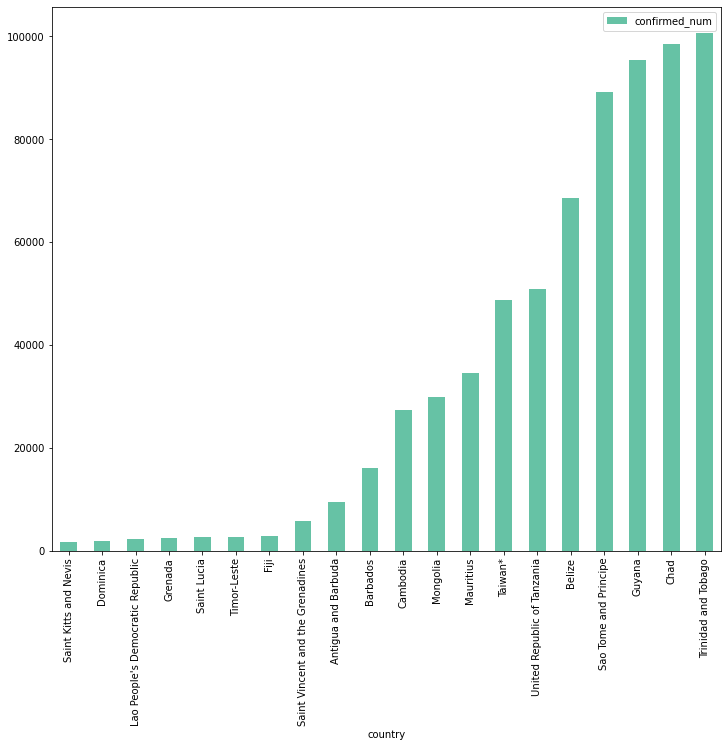

In [ ]:
contagios_1a.plot(kind = 'bar', stacked=False, colormap='Set2', figsize=(12, 10)), plt.savefig('menos_contagios.png')

In [ ]:
dieta_corta = df_dieta[['country', 'alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg',	'obesity', 'undernorished']].set_index('country')

In [ ]:
contagios_1b = dieta_corta.reindex(index=["Saint Kitts and Nevis", "Dominica", "Lao People's Democratic Republic", "Grenada", "Saint Lucia", "Timor-Leste", "Fiji", "Saint Vincent and the Grenadines", "Antigua and Barbuda", "Barbados", "Cambodia", "Mongolia", "Mauritius", "Taiwan*", "United Republic of Tanzania", "Belize", "Sao Tome and Principe", "Guyana", "Chad", "Trinidad and Tobago" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

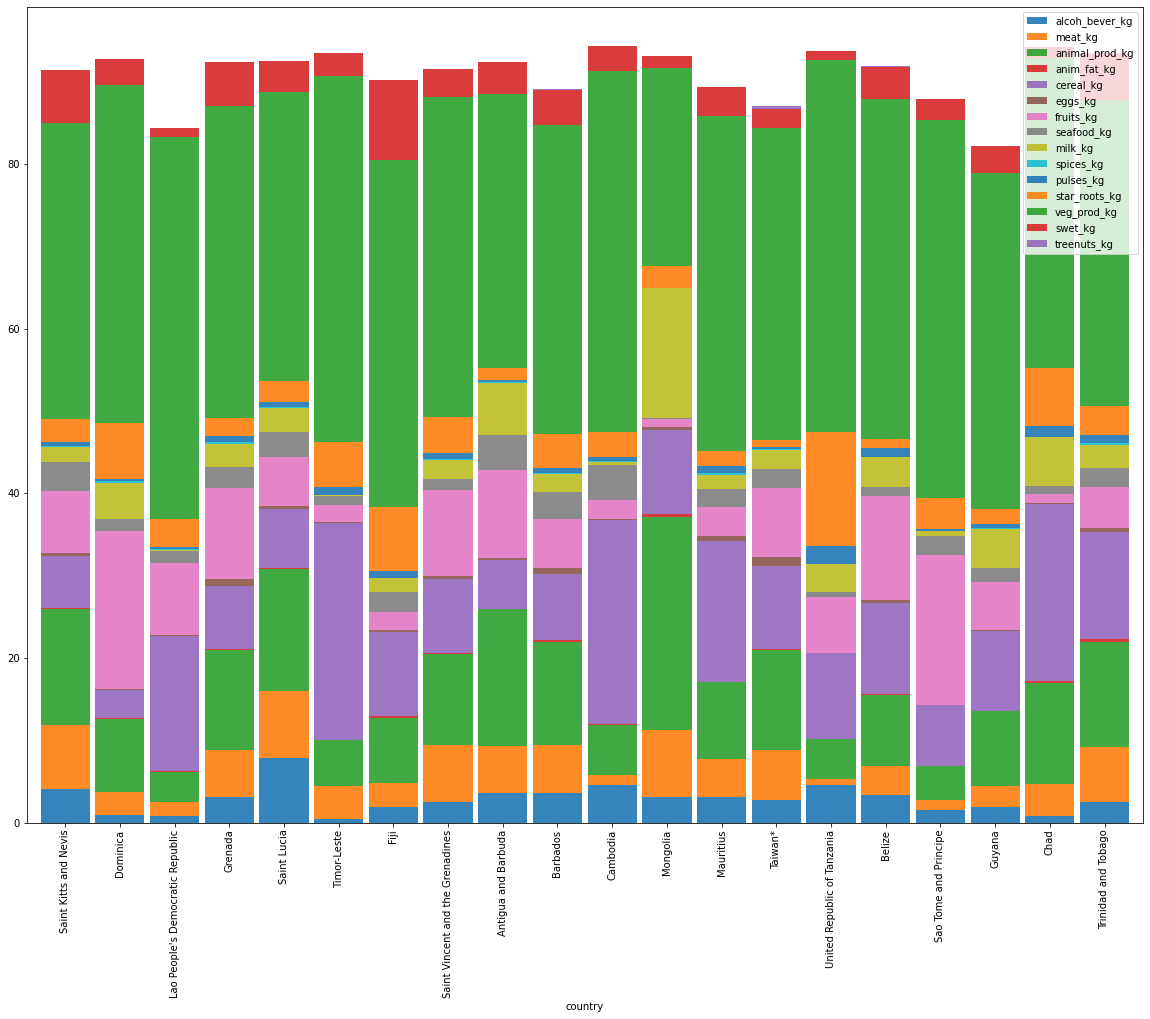

In [ ]:
contagios_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_conf1.png'), plt.legend(loc='best');
                 
             

### Países con más contagios

In [ ]:
dieta_4[dieta_4['confirmed_num'] > 10000].sort_values('confirmed_num',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,5.701679e+08,1.768020e+07,1.997761e+08,3.298780e+08,High-Income
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,3.605783e+08,1.147440e+07,2.947784e+08,2.118120e+08,Upper- Middle- Income
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,3.106348e+08,5.754200e+06,2.338035e+08,1.400100e+09,Lower-Middle-Income
Russian Federation,3742.5,4318.0,16152.5,248.6,8280.3,902.9,3162.0,1131.2,9325.3,11.8,142.6,6319.4,33847.2,4614.4,11.8,3.771038e+09,2.934660e+08,9.543280e+07,1.634100e+06,7.689060e+07,1.467330e+08,Upper- Middle- Income
South Africa,6265.8,5393.3,11843.3,59.3,17103.5,594.0,1935.5,536.5,4815.5,53.9,154.6,2850.3,38155.4,4467.7,10.8,1.609956e+09,3.696936e+08,6.097730e+07,1.305900e+06,5.064700e+07,5.962800e+07,Upper- Middle- Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,5.852360e+07,2.745300e+06,3.993570e+07,3.282400e+07,Upper- Middle- Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,5.601640e+07,6.048000e+06,4.581230e+07,1.277920e+08,Upper- Middle- Income
Colombia,3103.2,3554.0,12821.0,81.4,8105.5,813.2,11327.6,455.2,7744.3,34.3,350.3,5030.9,37177.4,4751.8,94.7,1.092712e+09,2.373312e+08,5.411390e+07,1.731600e+06,3.740240e+07,4.944400e+07,Upper- Middle- Income
Chile,4969.0,6149.2,15039.4,178.2,10857.9,775.7,3910.9,871.1,6996.6,13.3,267.7,4718.3,34958.4,3558.2,119.0,5.607360e+08,5.256900e+07,3.976650e+07,1.085200e+06,3.711790e+07,1.947000e+07,High-Income


In [ ]:
contagios_2 = dieta_4[dieta_4['confirmed_num'] > 10000].sort_values('confirmed_num',ascending=False).head(20)

In [ ]:
contagios_2a = contagios_2[['confirmed_num']]

In [ ]:
contagios_2a

,confirmed_num
country,
United States of America,5.701679e+08
Brazil,3.605783e+08
India,3.106348e+08
Russian Federation,9.543280e+07
South Africa,6.097730e+07
Peru,5.852360e+07
Mexico,5.601640e+07
Colombia,5.411390e+07
Chile,3.976650e+07


In [ ]:
contagios_2a.to_csv('mas_confirmados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff38c03d30>, None)

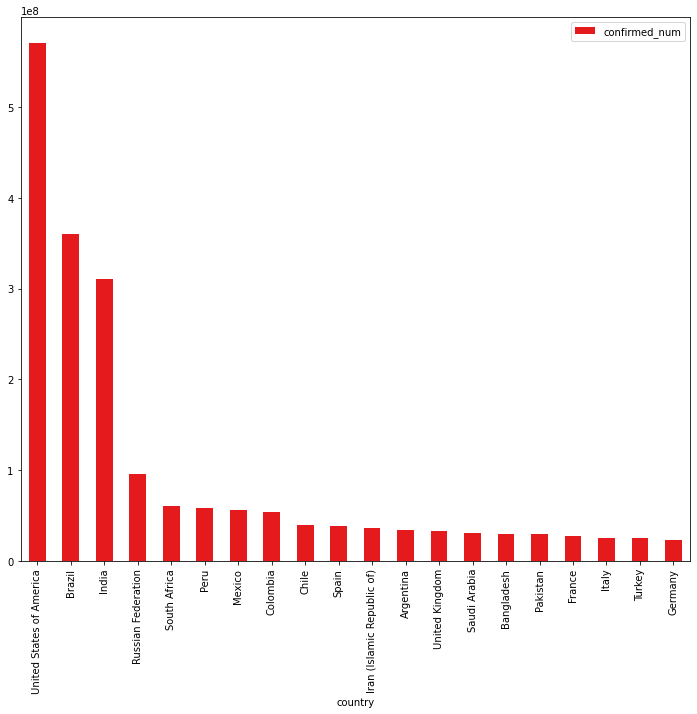

In [ ]:
contagios_2a.plot(kind = 'bar', stacked=False, colormap='Set1', figsize=(12, 10)), plt.savefig('mas_contagios.png')

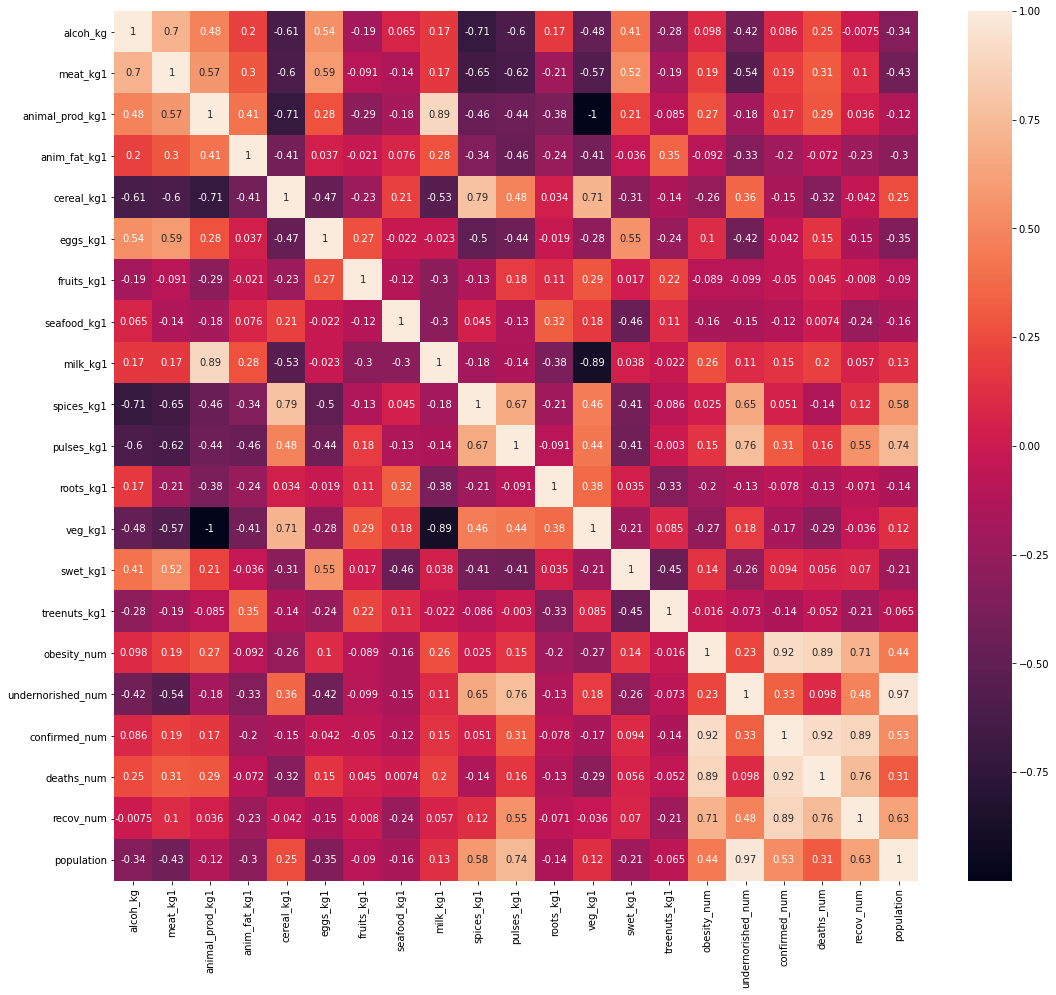

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(contagios_2.corr(), annot=True); plt.savefig('correl_contagios.png')

A tráves del gráfico anterior se puede observar que la variable de mayor correlación con casos confirmados es la obesidad en un 92%

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


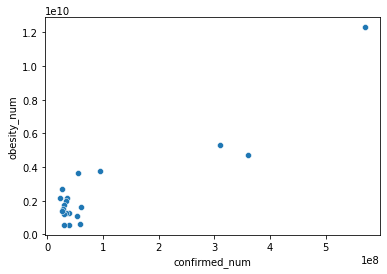

In [ ]:
sns.scatterplot(contagios_2['confirmed_num'], contagios_2['obesity_num']); plt.savefig('corr_cont_obesity.png')

Se requiere conocer la relacion entre obseidad y la ingesta por tipo de alimento

In [ ]:
contagios_2b = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Russian Federation", "South Africa", "Peru", "Mexico", "Colombia", "Chile", "Spain", "Iran (Islamic Republic of)", "Argentina", "United Kingdom", "Saudi Arabia", "Bangladesh", "Pakistan", "France", "Italy", "Turkey", "Germany" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished'])

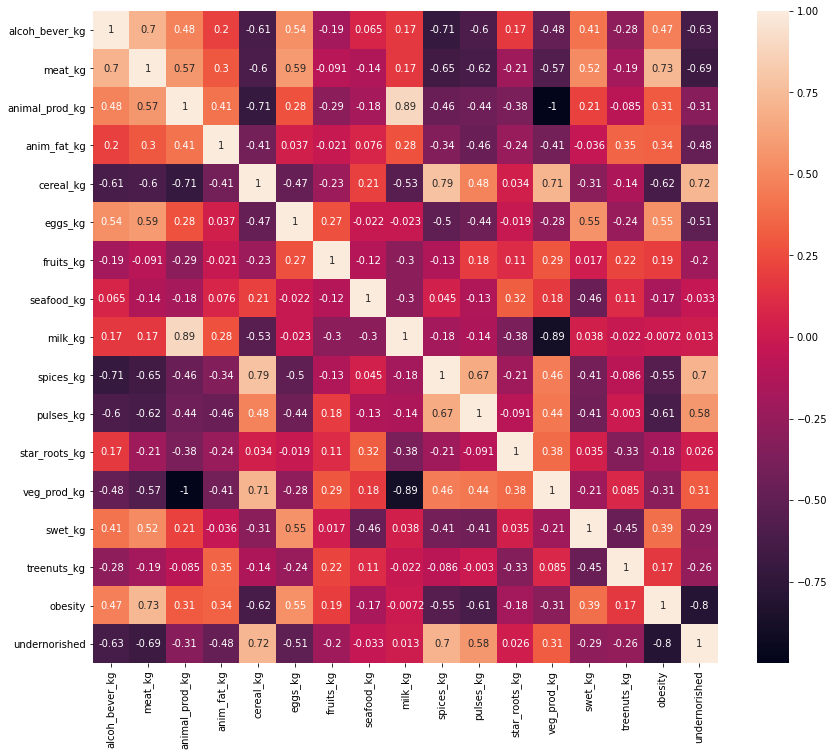

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(contagios_2b.corr(), annot=True);

La obesidad en los países con el mayor número de casos confirmados se encuentra relacionada a una ta ingesta de carne (73% de correlación); y a una baja ingesta de legumbres (-0.61% de correlación) 

In [ ]:
contagios_2c = dieta_corta.reindex(index=["United States of America", "Brazil", "India", "Russian Federation", "South Africa", "Peru", "Mexico", "Colombia", "Chile", "Spain", "Iran (Islamic Republic of)", "Argentina", "United Kingdom", "Saudi Arabia", "Bangladesh", "Pakistan", "France", "Italy", "Turkey", "Germany" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

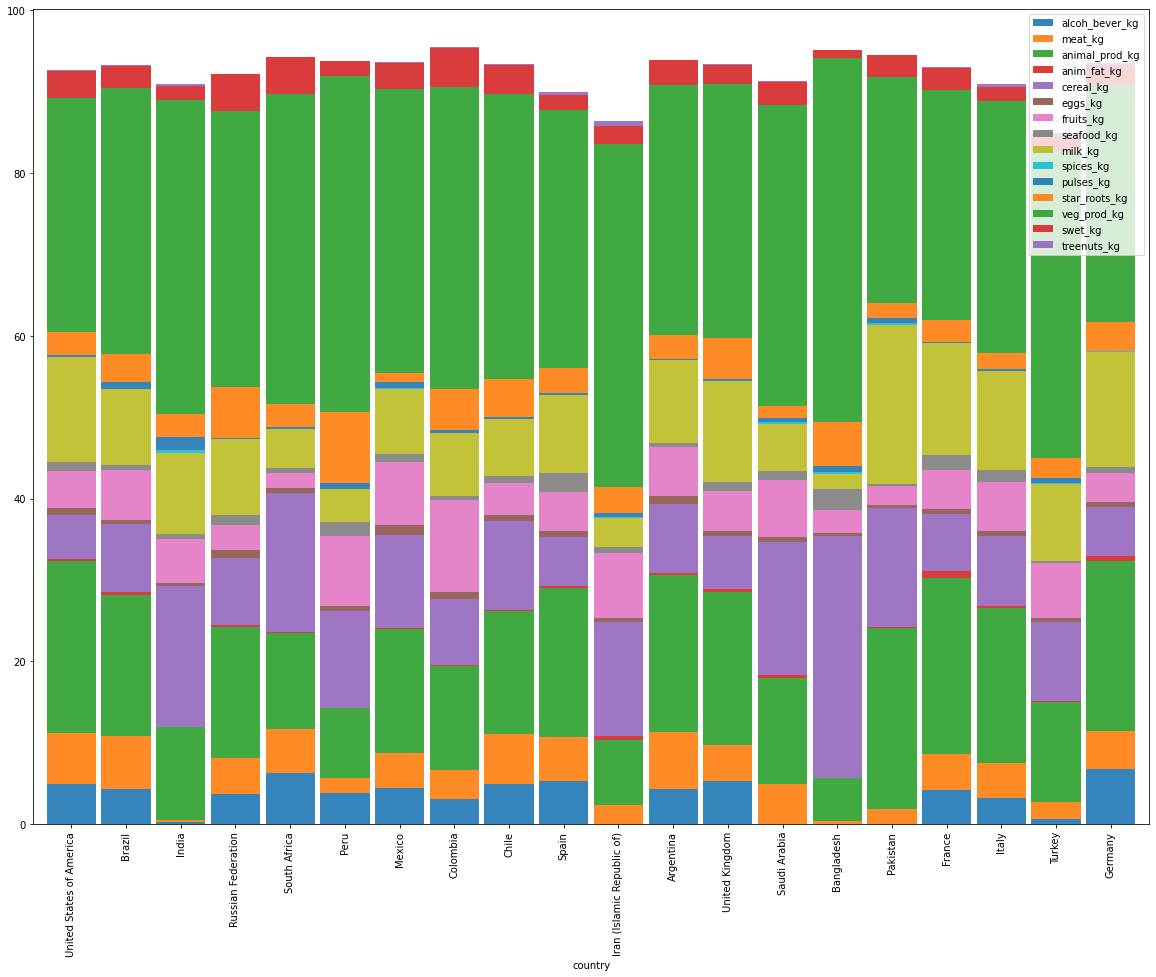

In [ ]:
contagios_2c.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_conf2.png'), plt.legend(loc='best');

Comparativo entre los dos grupos de países a traves del promedio de ingesta por tipo de alimento

In [ ]:
Promedios_c1 = contagios_1['alcoh_kg'].mean(), contagios_1['meat_kg1'].mean(), contagios_1['animal_prod_kg1'].mean(), contagios_1['anim_fat_kg1'].mean(), contagios_1['cereal_kg1'].mean(), contagios_1['eggs_kg1'].mean(), contagios_1['fruits_kg1'].mean(), contagios_1['seafood_kg1'].mean(), contagios_1['milk_kg1'].mean(), contagios_1['spices_kg1'].mean(), contagios_1['pulses_kg1'].mean(), contagios_1['roots_kg1'].mean(), contagios_1['veg_kg1'].mean(), contagios_1['swet_kg1'].mean(), contagios_1['treenuts_kg1'].mean() 

In [ ]:
Promedios_c1

(2844.86,
 4513.64,
 10617.945000000003,
 116.30500000000002,
 11809.9,
 340.60499999999996,
 7443.784999999999,
 2091.755,
 3301.8799999999997,
 117.915,
 658.915,
 4029.835,
 39378.24999999999,
 3614.63,
 50.809999999999995)

In [ ]:
Promedios_c2 = contagios_2['alcoh_kg'].mean(), contagios_2['meat_kg1'].mean(), contagios_2['animal_prod_kg1'].mean(), contagios_2['anim_fat_kg1'].mean(), contagios_2['cereal_kg1'].mean(), contagios_2['eggs_kg1'].mean(), contagios_2['fruits_kg1'].mean(), contagios_2['seafood_kg1'].mean(), contagios_2['milk_kg1'].mean(), contagios_2['spices_kg1'].mean(), contagios_2['pulses_kg1'].mean(), contagios_2['roots_kg1'].mean(), contagios_2['veg_kg1'].mean(), contagios_2['swet_kg1'].mean(), contagios_2['treenuts_kg1'].mean()

In [ ]:
Promedios_c2

(3270.2899999999995,
 4020.6049999999996,
 15422.74,
 244.22999999999996,
 11298.324999999999,
 647.2100000000002,
 5503.985000000001,
 1040.6399999999999,
 9287.92,
 84.065,
 446.20500000000004,
 3586.0199999999995,
 34574.91499999999,
 2736.275,
 175.72500000000002)

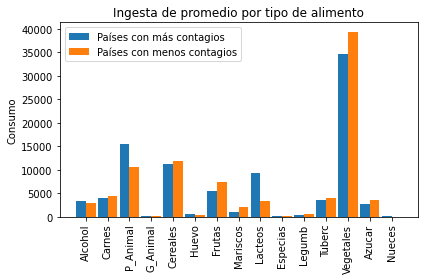

In [ ]:

Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
c2_mean = [3270, 4021, 15423, 244, 11298, 647, 5504, 1040, 9288, 84, 446, 3586, 34574, 2736, 175]
c1_mean = [2845, 4514, 10618, 116, 11801, 340, 7444, 2092, 3302, 118, 659, 4030, 39378, 3614, 51]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
figsize=(30,20)
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, c2_mean, width, label='Países con más contagios')
rects2 = ax.bar(x + width/2, c1_mean, width, label='Países con menos contagios')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()


fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()


plt.show()

La ingesta promedio de productos animales, lácteos y alcohol es mayor en países con mayor contagios, mientras que la ingesta de vegetales destaca en los países con menos contagios 

### MAPA DE CASOS CONFIRMADOS POR COVID-19 EN EL MUNDO

In [ ]:
import folium

In [ ]:
countries_geo = 'countries.geo.json'

In [ ]:
#Representar el mapa base
mapa = folium.Map(location=[48, -102], zoom_start=3)

#Representar el mapa choropleth con % de casos por pais
mapa.choropleth(
    geo_data=countries_geo,
    data=df_dieta,
    columns=['country', 'confirmed'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.4, 
    line_opacity=0.5,
    legend_name='COVID-19 confirmed') # Agrego mi mapa cloroplético a mi mapa original


mapa

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### **MUERTES**

### Países con menos muertes

In [ ]:
dieta_4['deaths_num'].min()

0.0

In [ ]:
dieta_4['deaths_num'].max()

17680200.006284002

In [ ]:
dieta_4[dieta_4['deaths_num'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Cambodia,4578.3,1224.7,6080.0,37.7,24890.6,131.0,2318.4,4236.9,328.5,78.4,490.3,3051.9,43919.5,2992.3,23.8,54239500.0,2.541508e+08,27299.995607,0.0,26300.005191,15497000.0,Lower-Middle-Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,4.464000e+05,1900.000008,0.0,1800.000000,72000.0,Upper- Middle- Income
French Polynesia,4699.7,7079.8,14358.5,30.9,7647.9,538.6,4351.2,3480.9,2936.4,11.1,145.2,3543.6,35655.9,2871.5,40.5,0.0,1.176000e+06,0.000000,0.0,0.000000,280000.0,High-Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.000000e+00,2399.999994,0.0,2399.999994,113000.0,Upper- Middle- Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5700000.0,3.375000e+05,0.000000,0.0,0.000000,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,183030900.0,1.232236e+09,0.000000,0.0,0.000000,25779000.0,Low-Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,1.194930e+08,2199.996486,0.0,2000.001414,7242000.0,Lower-Middle-Income
Mongolia,3143.0,8092.9,25890.4,384.6,10141.5,372.7,1041.3,44.0,15856.0,3.7,36.6,2615.5,24104.6,1468.0,13.7,65875600.0,4.503740e+07,29800.000649,0.0,28899.998791,3361000.0,Lower-Middle-Income
Myanmar,219.5,4975.3,13518.8,175.1,16760.8,461.3,4028.7,4042.4,3630.6,217.0,1280.6,1451.4,36480.7,2859.2,291.3,311812800.0,5.798624e+08,0.000000,0.0,0.000000,54704000.0,Lower-Middle-Income


Guardar la lista de países sin regsitro de muertes

In [ ]:
paises_sin_reg2 = dieta_4[dieta_4['deaths_num'] == 0.0 ]

In [ ]:
paises_sin_reg2.to_csv('países_sin_registro2.csv')

Eliminar las filas de los paises que no cuentan con regsitros de muertes

In [ ]:
dieta_4_death =  dieta_4.drop(["Cambodia", "Dominica", "French Polynesia", "Grenada", "Kiribati", "Korea, North", "Lao People's Democratic Republic", "Mongolia", "Myanmar", "New Caledonia", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "Solomon Islands", "Timor-Leste", "Turkmenistan", "Vanuatu"],axis=0)

In [ ]:
dieta_4_death['deaths_num'].min()

99.99987200000001

In [ ]:
dieta_4_death[dieta_4_death['deaths_num'] == 99.99987200000001 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3315200.0,2800.0,99.999872,2299.999744,896000.0,Upper- Middle- Income


In [ ]:
dieta_4_death[dieta_4_death['deaths_num'] > 99.9].sort_values('deaths_num',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3.315200e+06,2800.000000,99.999872,2299.999744,896000.0,Upper- Middle- Income
Antigua and Barbuda,3576.4,5688.8,16661.3,8.7,5996.0,227.4,10745.1,4148.9,6366.3,152.4,184.0,1452.2,33323.3,3874.9,25.3,1871800.0,0.000000e+00,9399.999966,299.999952,8900.000046,98000.0,High-Income
Botswana,4271.7,2284.0,14448.6,340.2,11432.0,140.2,2846.5,355.1,11021.7,162.6,272.9,4761.4,35549.1,4785.7,15.0,37303700.0,6.116880e+07,130799.999953,300.000526,13599.999903,2317000.0,Upper- Middle- Income
Belize,3380.3,3489.0,8685.6,83.2,11070.0,392.3,12609.4,1032.5,3631.7,19.5,1125.9,1061.4,41312.2,3979.8,34.0,9385600.0,3.142500e+06,68599.999850,600.000039,4399.999867,419000.0,Upper- Middle- Income
Taiwan*,2766.3,6055.8,12131.2,157.7,10080.8,1090.0,8390.4,2318.2,2329.9,102.3,207.7,856.5,37868.4,2345.5,418.5,0.0,8.263500e+07,48699.992850,698.856000,45699.988200,23610000.0,High-Income
Barbados,3565.0,5847.7,12497.6,221.2,8066.6,779.2,5872.3,3275.0,2204.1,156.5,639.1,4081.2,37516.7,4334.4,85.2,7117600.0,1.119300e+06,16100.000007,699.999888,13199.999897,287000.0,High-Income
Iceland,4754.5,4626.9,23970.0,946.1,4119.6,555.7,4840.5,4611.7,13002.8,67.6,37.6,1990.9,26033.1,3947.2,75.2,8500800.0,7.360000e+05,206399.999920,999.999888,193900.000032,368000.0,High-Income
Malta,3905.1,4609.6,13609.2,206.2,7899.6,671.4,4631.0,1792.2,6254.6,33.1,219.7,2059.0,36389.9,5216.4,123.6,16182000.0,1.044000e+06,161200.000242,1000.000098,93399.999966,522000.0,High-Income
Mauritius,3080.5,4699.2,9270.0,7.4,17185.5,591.0,3568.0,2130.3,1716.6,184.7,856.0,1834.8,40717.5,3568.0,36.9,14547500.0,8.222500e+06,34600.000435,1000.000210,33499.999445,1265000.0,High-Income


In [ ]:
muertes_1 = dieta_4_death[dieta_4_death['deaths_num'] > 99.9].sort_values('deaths_num',ascending=True).head(20)

In [ ]:
muertes_1a = muertes_1[['deaths_num']]

In [ ]:
muertes_1a

,deaths_num
country,
Fiji,99.999872
Antigua and Barbuda,299.999952
Botswana,300.000526
Belize,600.000039
Taiwan*,698.856000
Barbados,699.999888
Iceland,999.999888
Malta,1000.000098
Mauritius,1000.000210


In [ ]:
muertes_1a.to_csv('menos_muertes.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff30a13ef0>, None)

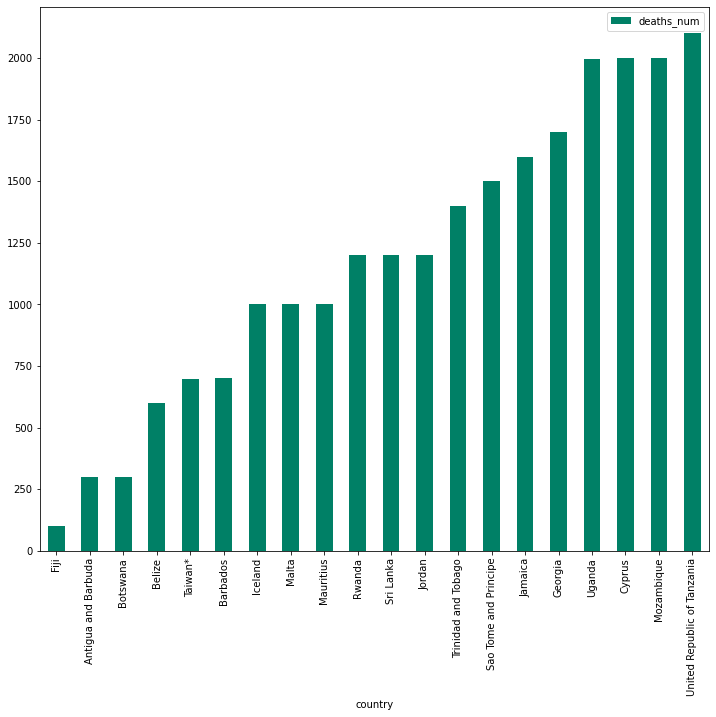

In [ ]:
muertes_1a.plot(kind = 'bar', stacked=False, colormap='summer', figsize=(12, 10)), plt.savefig('menos_muertes.png')

In [ ]:
muertes_1b = dieta_corta.reindex(index=['Fiji', 'Antigua and Barbuda', 'Botswana', 'Belize', 'Taiwan*', 'Barbados', 'Iceland', 'Malta', 'Mauritius', 'Rwanda', 'Sri Lanka', 'Jordan', 'Trinidad and Tobago', 'Sao Tome and Principe', 'Jamaica', 'Georgia', 'Uganda', 'Cyprus', 'Mozambique', 'United Republic of Tanzania'], columns=['alcoh_bever_kg', 'meat_kg', 'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

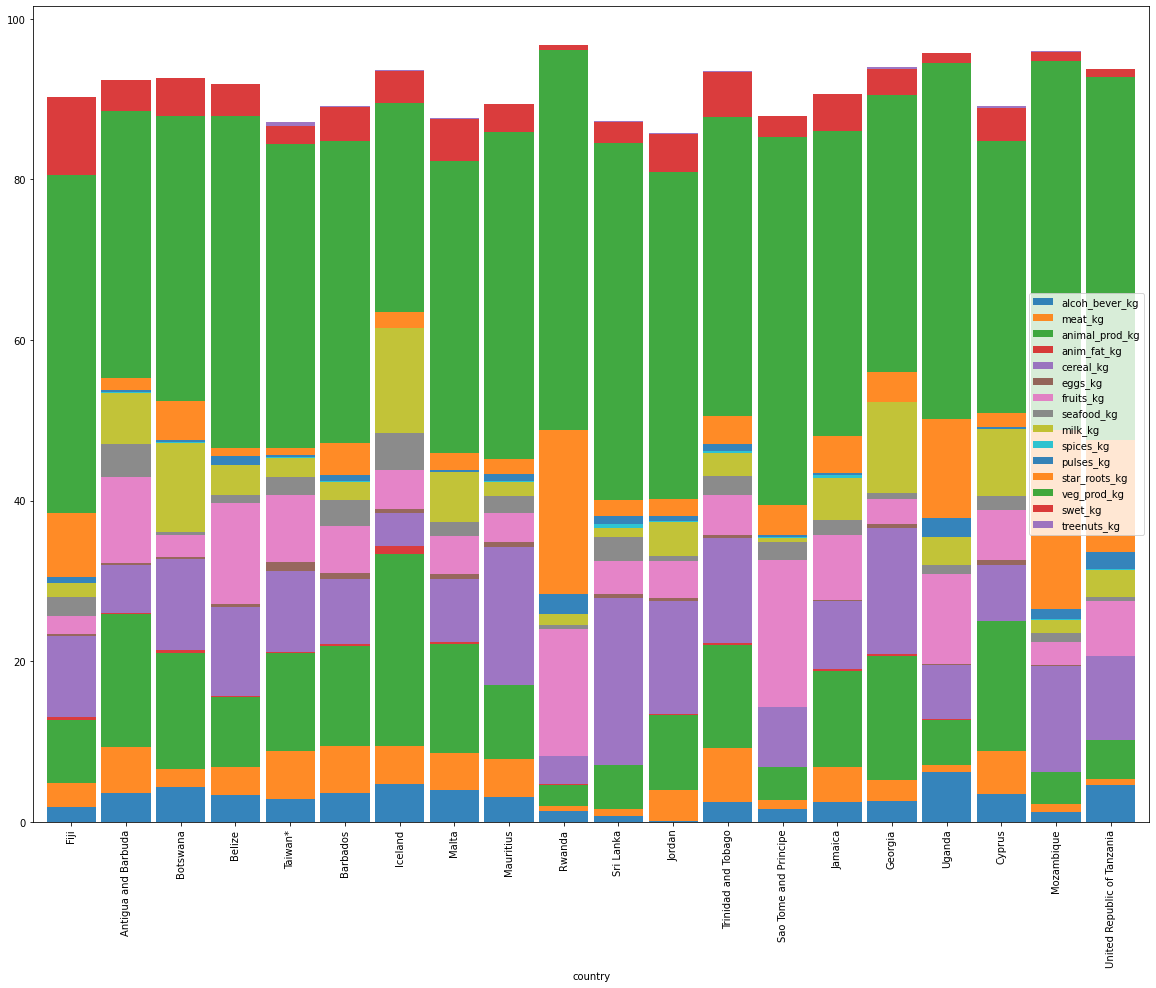

In [ ]:
muertes_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_muert1.png'), plt.legend(loc='best');
                 

### Países con más muertes 

In [ ]:
dieta_4['deaths_num'].max()

17680200.006284002

In [ ]:
dieta_4[dieta_4['deaths_num'] == 17680200.006284002 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,659756000.0,5.701679e+08,1.768020e+07,1.997761e+08,329878000.0,High-Income


In [ ]:
dieta_4[dieta_4['deaths_num'] <= 17680200.006284002 ].sort_values('deaths_num',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,5.701679e+08,1.768020e+07,1.997761e+08,3.298780e+08,High-Income
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,3.605783e+08,1.147440e+07,2.947784e+08,2.118120e+08,Upper- Middle- Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,5.601640e+07,6.048000e+06,4.581230e+07,1.277920e+08,Upper- Middle- Income
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,3.106348e+08,5.754200e+06,2.338035e+08,1.400100e+09,Lower-Middle-Income
United Kingdom,5263.2,4418.1,18879.8,275.4,6541.2,621.0,4955.1,1091.1,12368.4,65.3,203.5,5113.3,31111.6,2438.3,90.1,1.981220e+09,1.343200e+08,3.276430e+07,4.151500e+06,1.547000e+05,6.716000e+07,High-Income
Italy,3189.2,4296.3,19032.9,283.4,8541.7,624.7,6020.7,1581.6,12125.8,6.4,278.1,1904.3,30967.1,1717.5,423.0,1.380778e+09,1.205920e+08,2.593450e+07,3.543700e+06,2.054700e+07,6.029600e+07,High-Income
France,4163.1,4400.5,21709.7,790.7,6995.1,611.0,4878.0,1821.4,13784.0,16.4,99.1,2696.3,28290.3,2611.0,209.3,1.506608e+09,1.298800e+08,2.804590e+07,3.051800e+06,8.512500e+06,6.494000e+07,High-Income
Spain,5315.2,5345.6,18338.2,235.7,6054.8,732.1,4833.2,2264.6,9599.1,6.9,266.6,3097.5,31658.1,1848.2,428.7,1.290908e+09,9.527000e+07,3.860540e+07,2.883800e+06,1.503760e+07,4.763500e+07,High-Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,5.852360e+07,2.745300e+06,3.993570e+07,3.282400e+07,Upper- Middle- Income


In [ ]:
muertes_2 = dieta_4[dieta_4['deaths_num'] <= 17680200.006284002 ].sort_values('deaths_num',ascending=False).head(20)

In [ ]:
muertes_2a = muertes_2[['deaths_num']]

In [ ]:
muertes_2a

,deaths_num
country,
United States of America,1.768020e+07
Brazil,1.147440e+07
Mexico,6.048000e+06
India,5.754200e+06
United Kingdom,4.151500e+06
Italy,3.543700e+06
France,3.051800e+06
Spain,2.883800e+06
Peru,2.745300e+06


In [ ]:
muertes_2a.to_csv('mas_muertes.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff2ac86da0>, None)

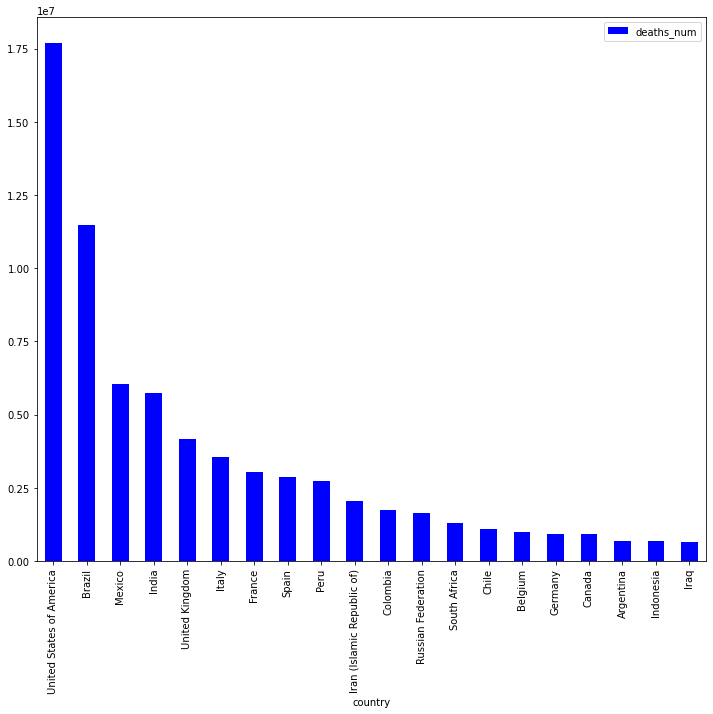

In [ ]:

muertes_2a.plot(kind = 'bar', stacked=False, colormap='winter', figsize=(12, 10)), plt.savefig('mas_muertes.png')

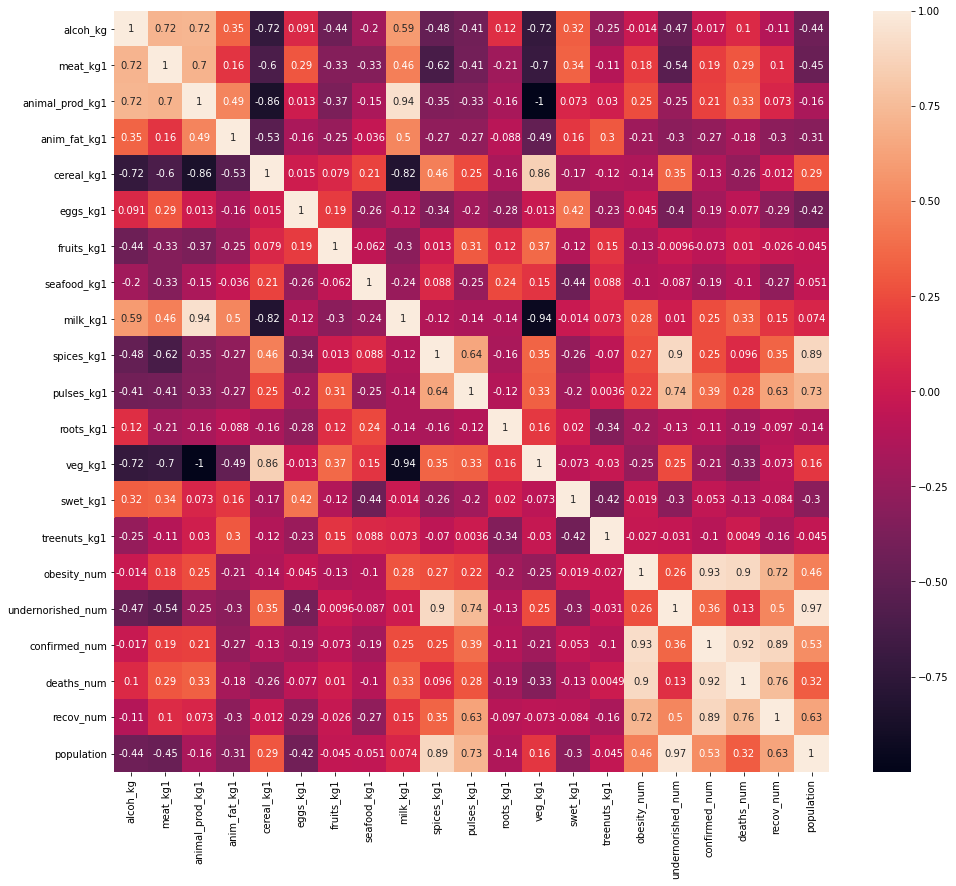

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(muertes_2.corr(), annot=True);plt.savefig('correl_muertes.png')


Dentro del grupo de los 20 paises con mayor número de muertes por Covid-19 existe una correlacion (0.9)con el grado de obesidad que cuentan esos países 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


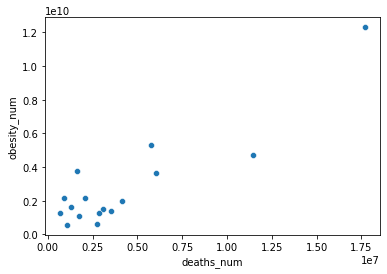

In [ ]:
sns.scatterplot(muertes_2['deaths_num'], contagios_2['obesity_num']); plt.savefig('corr_muert_obesity.png')

Se requiere conocer la correlacion que existe entre obesidad y la ongesta por tipo de alimento

In [ ]:
muertes_2b = dieta_corta.reindex(index=["United States of America", "Brazil", "Mexico", "India", "United Kingdom", "Italy", "France", "Spain", "Peru", "Iran (Islamic Republic of)", "Colombia", "Russian Federation", "South Africa", "Chile", "Belgium", "Germany", "Canada", "Argentina", "Indonesia", "Iraq"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg', 'obesity', 'undernorished'])

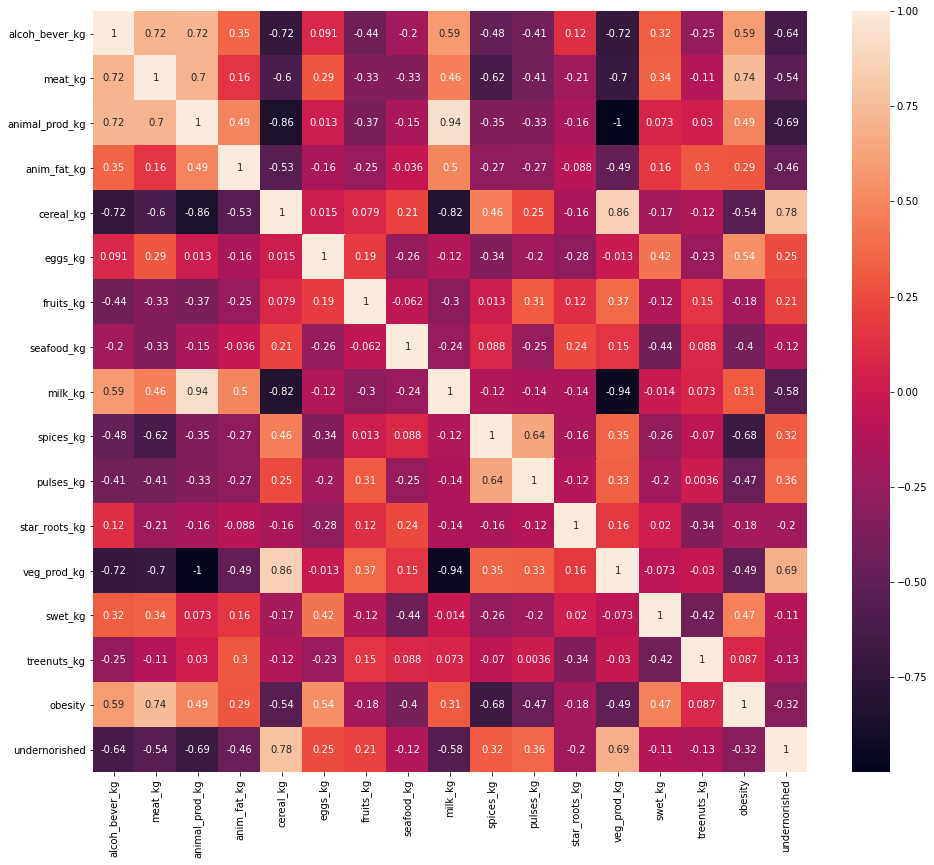

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(muertes_2b.corr(), annot=True); plt.savefig('correl_muertes_obesidad.png')


El grado de obesidad en los paises con más muertes registradas indica tiene una correlacion con la ingesta de carne (0.74) y  alcohol (0.59)

In [ ]:
muertes_2c = dieta_corta.reindex(index=["United States of America", "Brazil", "Mexico", "India", "United Kingdom", "Italy", "France", "Spain", "Peru", "Iran (Islamic Republic of)", "Colombia", "Russian Federation", "South Africa", "Chile", "Belgium", "Germany", "Canada", "Argentina", "Indonesia", "Iraq"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

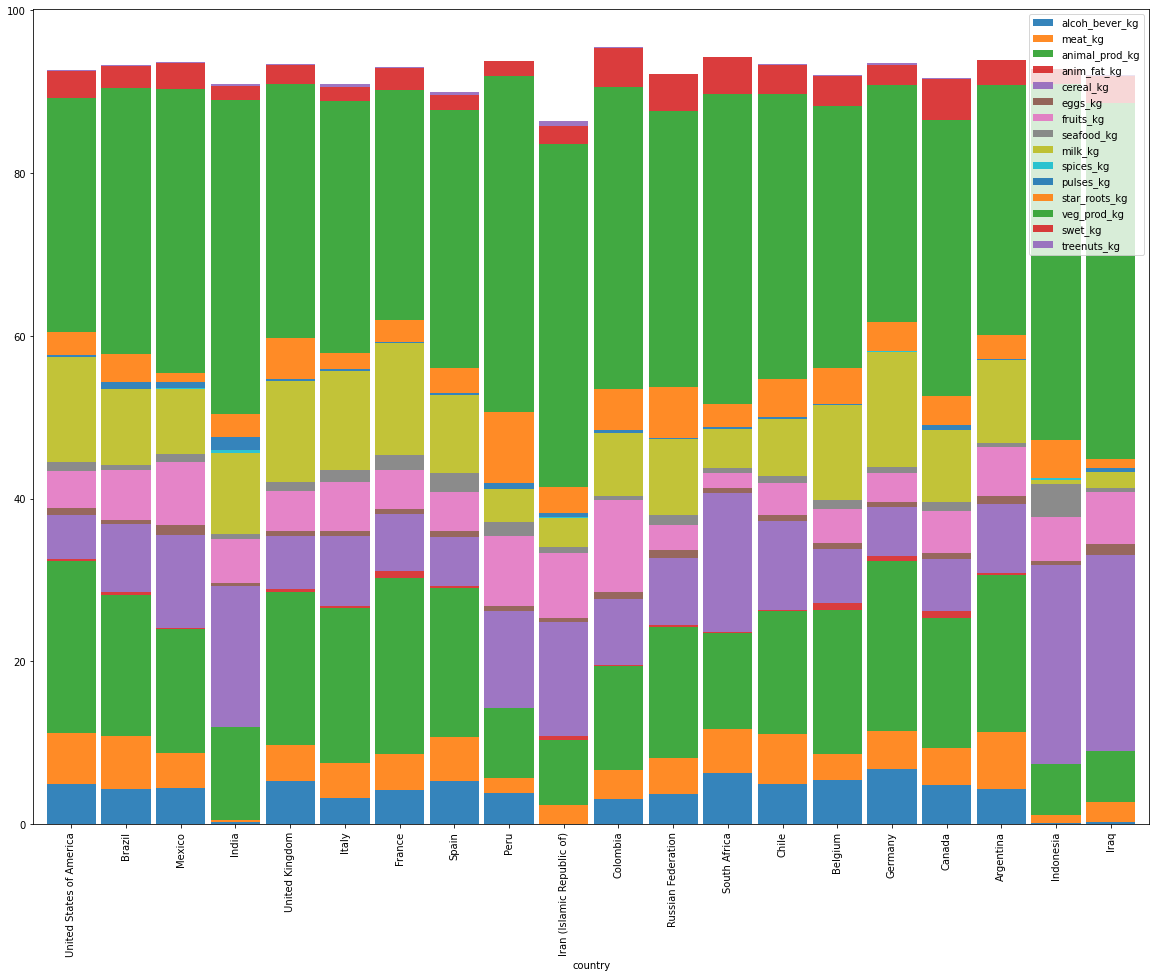

In [ ]:
muertes_2c.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_muert2.png'), plt.legend(loc='best');

Comparativos de los grupos de paises con menor y mayor número de muertes, respecto al promedio de ingesta por tipo de alimento

In [ ]:
Promedios_m1 = muertes_1['alcoh_kg'].mean(), muertes_1['meat_kg1'].mean(), muertes_1['animal_prod_kg1'].mean(), muertes_1['anim_fat_kg1'].mean(), muertes_1['cereal_kg1'].mean(), muertes_1['eggs_kg1'].mean(), muertes_1['fruits_kg1'].mean(), muertes_1['seafood_kg1'].mean(), muertes_1['milk_kg1'].mean(), muertes_1['spices_kg1'].mean(), muertes_1['pulses_kg1'].mean(), muertes_1['roots_kg1'].mean(), muertes_1['veg_kg1'].mean(), muertes_1['swet_kg1'].mean(), muertes_1['treenuts_kg1'].mean()

In [ ]:
Promedios_m1

(2882.1399999999994,
 3424.109999999999,
 10584.035,
 164.53499999999997,
 10325.029999999999,
 374.1649999999999,
 7090.8200000000015,
 1896.9300000000003,
 4585.05,
 112.585,
 795.42,
 5822.210000000001,
 39413.95,
 3679.8599999999997,
 91.005)

In [ ]:
Promedios_m2 = muertes_2['alcoh_kg'].mean(), muertes_2['meat_kg1'].mean(), muertes_2['animal_prod_kg1'].mean(), muertes_2['anim_fat_kg1'].mean(), muertes_2['cereal_kg1'].mean(), muertes_2['eggs_kg1'].mean(), muertes_2['fruits_kg1'].mean(), muertes_2['seafood_kg1'].mean(), muertes_2['milk_kg1'].mean(), muertes_2['spices_kg1'].mean(), muertes_2['pulses_kg1'].mean(), muertes_2['roots_kg1'].mean(), muertes_2['veg_kg1'].mean(), muertes_2['swet_kg1'].mean(), muertes_2['treenuts_kg1'].mean()

In [ ]:
Promedios_m2

(3761.7399999999993,
 4121.570000000001,
 15098.87,
 298.5999999999999,
 10853.725,
 722.4100000000001,
 5608.664999999999,
 1177.1699999999998,
 8599.54,
 55.54999999999999,
 384.13,
 3712.0850000000005,
 34898.205,
 3023.3749999999995,
 160.70000000000005)

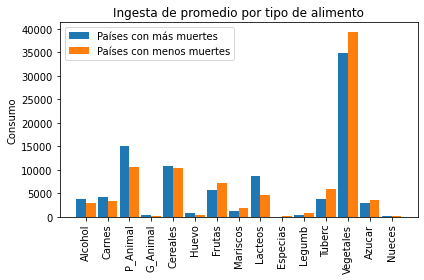

In [ ]:
Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
m1_mean = [2882, 3424, 10584, 164, 10325, 374, 7091, 1897, 4585, 112, 795, 5822, 39414, 3680, 91]
m2_mean = [3762, 4121, 15099, 299, 10854, 722, 5609, 1177, 8599, 55, 384, 3712, 34898, 3023, 161]



#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, m2_mean, width, label='Países con más muertes')
rects2 = ax.bar(x + width/2, m1_mean, width, label='Países con menos muertes')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

fig.tight_layout()
plt.savefig('comparativo_muerte.png')
#Mostramos la grafica con el metodo show()

plt.show()



Para el grupo de países con mayor número de muertes la ingesta de alcohol, carnes , productos animales, cereales y lácteos es mayor; mientras que en los países con menos muertes se destaca un mayor consumo de vegetales, tuberculos y frutas.

#### **RECUPERADOS**

### Países con el menor numero de recuperados

In [ ]:
dieta_4['recov_num'].min()

0.0

In [ ]:
dieta_4[dieta_4['recov_num'] == 0.0 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
French Polynesia,4699.7,7079.8,14358.5,30.9,7647.9,538.6,4351.2,3480.9,2936.4,11.1,145.2,3543.6,35655.9,2871.5,40.5,0.0,1.176000e+06,0.000000e+00,0.000000,0.0,280000.0,High-Income
Kiribati,297.0,2385.6,8895.8,48.6,8274.7,164.0,5890.7,6106.5,156.1,6.4,3.2,7183.0,41104.2,4137.3,195.1,5700000.0,3.375000e+05,0.000000e+00,0.000000,0.0,125000.0,Lower-Middle-Income
"Korea, North",898.1,1387.2,3393.3,1.0,17937.8,466.8,6138.3,1156.8,314.6,0.0,1100.0,6243.8,46604.6,369.4,42.6,183030900.0,1.232236e+09,0.000000e+00,0.000000,0.0,25779000.0,Low-Income
Myanmar,219.5,4975.3,13518.8,175.1,16760.8,461.3,4028.7,4042.4,3630.6,217.0,1280.6,1451.4,36480.7,2859.2,291.3,311812800.0,5.798624e+08,0.000000e+00,0.000000,0.0,54704000.0,Lower-Middle-Income
New Caledonia,5036.3,5868.7,11781.8,82.1,8584.0,749.4,5585.5,2036.1,2767.5,48.8,127.5,2564.8,38220.8,3190.1,37.6,0.0,2.094500e+06,0.000000e+00,0.000000,0.0,295000.0,High-Income
Samoa,1423.6,5799.3,11163.0,226.2,3676.8,131.4,10784.5,2778.8,1964.7,58.2,0.0,7694.4,38834.9,2081.1,10.8,9100000.0,5.400000e+05,0.000000e+00,0.000000,0.0,200000.0,Upper- Middle- Income
Serbia,4392.0,3589.3,16746.6,252.4,9748.5,632.2,5975.3,414.8,11619.0,24.2,180.5,2545.0,33247.6,2025.5,126.8,163489500.0,3.965490e+07,3.065700e+06,69799.998420,0.0,6957000.0,Upper- Middle- Income
Solomon Islands,829.8,889.7,3850.4,103.8,9023.3,82.6,3279.8,2284.0,438.0,36.4,736.6,24250.0,46149.2,826.8,35.6,14657500.0,6.363500e+06,0.000000e+00,0.000000,0.0,715000.0,Lower-Middle-Income
Sweden,4423.2,4147.6,24062.7,1044.2,6192.3,726.6,3540.5,1765.9,16368.7,48.4,93.7,2834.3,25928.2,2521.1,99.6,229331700.0,2.075400e+07,8.606800e+06,581000.001039,0.0,10377000.0,High-Income


Se guardan los países sin registros de recuperados

In [ ]:
paises_sin_reg3 = dieta_4[dieta_4['recov_num'] == 0.0 ]

Se eliminan los paises que no tienen registro

In [ ]:
dieta_4_recov =  dieta_4.drop(["French Polynesia", "Kiribati", "Korea, North", "Myanmar", "New Caledonia", "Samoa", "Serbia", "Solomon Islands", "Sweden", "Turkmenistan", "Vanuatu"],axis=0)




In [ ]:
dieta_4_recov['recov_num'].min()

1699.9999739999998

In [ ]:
dieta_4_recov[dieta_4_recov['recov_num'] == 1699.9999739999998 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.0,1699.999974,0.0,1699.999974,54000.0,High-Income


In [ ]:
dieta_4_recov[dieta_4_recov['recov_num'] > 1699.99].sort_values('recov_num',ascending=True).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Saint Kitts and Nevis,4086.7,7820.7,14025.2,173.5,6313.5,386.8,7544.9,3417.4,1895.0,90.1,542.2,2715.0,35967.7,6462.3,67.3,1247400.0,0.000000e+00,1699.999974,0.000000,1699.999974,54000.0,High-Income
Dominica,941.0,2782.0,8901.1,31.9,3401.4,124.4,19302.8,1418.8,4421.7,151.2,225.5,6847.7,41098.9,3173.8,3.5,2030400.0,4.464000e+05,1900.000008,0.000000,1800.000000,72000.0,Upper- Middle- Income
Lao People's Democratic Republic,788.3,1711.1,3657.9,97.9,16394.3,106.3,8815.8,1421.3,163.2,131.7,148.5,3483.5,46341.6,1110.1,2.8,32589000.0,1.194930e+08,2199.996486,0.000000,2000.001414,7242000.0,Lower-Middle-Income
Fiji,1859.8,3000.4,7851.1,292.2,10144.0,268.2,2163.6,2383.2,1742.1,50.0,774.6,7859.9,42146.9,9725.9,15.7,26880000.0,3.315200e+06,2800.000000,99.999872,2299.999744,896000.0,Upper- Middle- Income
Grenada,3131.5,5654.6,12131.9,127.6,7656.9,922.6,11060.8,2580.2,2718.3,317.1,641.7,2222.2,37864.8,5448.0,14.3,2282600.0,0.000000e+00,2399.999994,0.000000,2399.999994,113000.0,Upper- Middle- Income
Timor-Leste,445.9,4037.6,5498.3,89.7,26332.0,102.5,2102.7,1022.5,130.7,50.0,909.8,5502.2,44503.0,2820.3,1.3,3822200.0,3.281820e+07,2600.000148,0.000000,2499.999534,1318000.0,Lower-Middle-Income
Saint Lucia,7802.4,8170.0,14889.3,25.2,7209.1,332.6,5945.3,3065.2,2888.1,178.0,566.3,2642.7,35096.4,3704.3,57.5,3603600.0,0.000000e+00,2599.999948,0.000000,2500.000048,182000.0,Upper- Middle- Income
Belize,3380.3,3489.0,8685.6,83.2,11070.0,392.3,12609.4,1032.5,3631.7,19.5,1125.9,1061.4,41312.2,3979.8,34.0,9385600.0,3.142500e+06,68599.999850,600.000039,4399.999867,419000.0,Upper- Middle- Income
Saint Vincent and the Grenadines,2526.0,6918.4,11086.5,22.0,9014.2,341.2,10471.0,1378.5,2259.3,211.3,645.2,4373.4,38900.5,3459.2,35.7,2641800.0,6.327000e+05,5799.999972,0.000000,5599.999950,111000.0,Upper- Middle- Income


In [ ]:
recuperados_1 = dieta_4_recov[dieta_4_recov['recov_num'] > 1699.99].sort_values('recov_num',ascending=True).head(20)


In [ ]:
recuperados_1a = recuperados_1[['recov_num']]

In [ ]:
recuperados_1a

,recov_num
country,
Saint Kitts and Nevis,1699.999974
Dominica,1800.000000
Lao People's Democratic Republic,2000.001414
Fiji,2299.999744
Grenada,2399.999994
Timor-Leste,2499.999534
Saint Lucia,2500.000048
Belize,4399.999867
Saint Vincent and the Grenadines,5599.999950


In [ ]:
recuperados_1a.to_csv('menos_recuperados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff2ba586a0>, None)

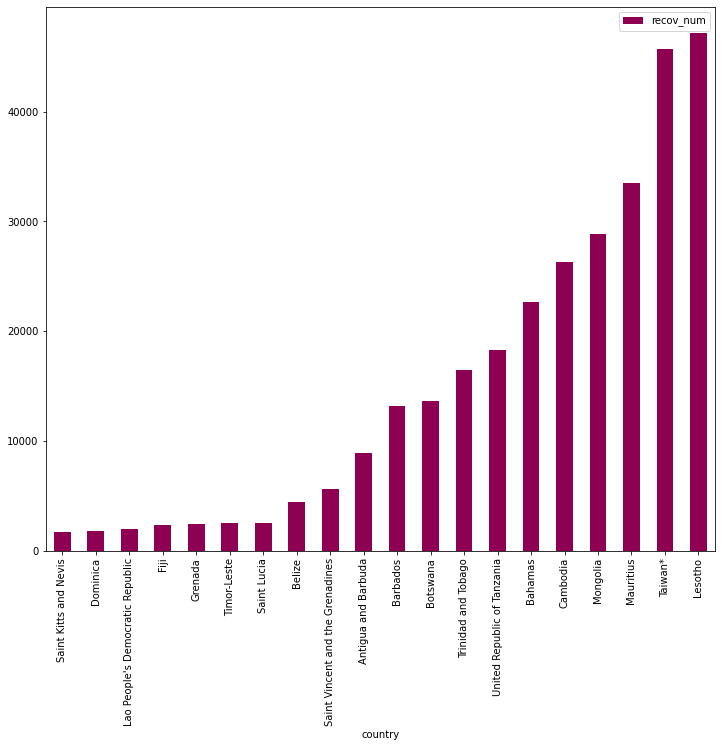

In [ ]:
recuperados_1a.plot(kind = 'bar', stacked=False, colormap= 'PiYG', figsize=(12, 10)), plt.savefig('menos_recupe.png')

In [ ]:
recuperados_1b = dieta_corta.reindex(index=["Saint Kitts and Nevis", "Dominica", "Lao People's Democratic Republic", "Fiji", "Grenada", "Timor-Leste", "Saint Lucia", "Belize", "Saint Vincent and the Grenadines", "Antigua and Barbuda", "Barbados", "Botswana", "Trinidad and Tobago", "United Republic of Tanzania", "Bahamas", "Cambodia", "Mongolia", "Mauritius", "Taiwan*", "Lesotho" ], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

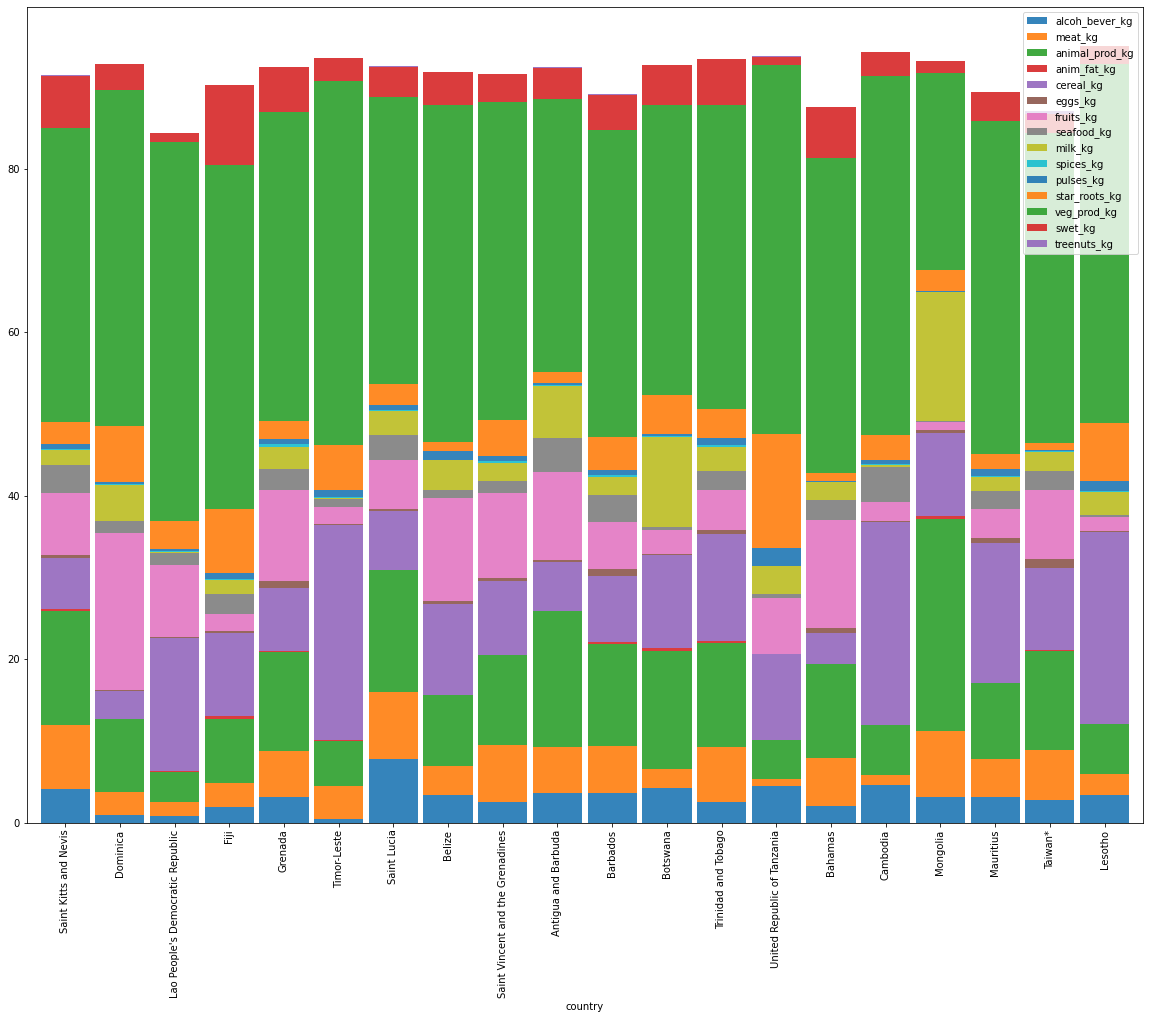

In [ ]:
recuperados_1b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_recp1.png'), plt.legend(loc='best');

### Países con más número de personas recuperadas

In [ ]:
dieta_4['recov_num'].max()

294778399.89597595

In [ ]:
dieta_4[dieta_4['recov_num'] == 294778399.89597595 ]

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,423624000.0,3.605783e+08,1.147440e+07,2.947784e+08,211812000.0,Upper- Middle- Income


In [ ]:
dieta_4[dieta_4['recov_num'] <= 294778399.89597595 ].sort_values('recov_num',ascending=False).head(20)

,alcoh_kg,meat_kg1,animal_prod_kg1,anim_fat_kg1,cereal_kg1,eggs_kg1,fruits_kg1,seafood_kg1,milk_kg1,spices_kg1,pulses_kg1,roots_kg1,veg_kg1,swet_kg1,treenuts_kg1,obesity_num,undernorished_num,confirmed_num,deaths_num,recov_num,population,income_level
country,,,,,,,,,,,,,,,,,,,,,,
Brazil,4362.9,6478.4,17347.0,280.3,8429.2,504.2,6093.6,589.9,9341.6,7.1,925.4,3395.9,32653.7,2775.5,51.3,4.723408e+09,4.236240e+08,3.605783e+08,1.147440e+07,2.947784e+08,2.118120e+08,Upper- Middle- Income
India,195.9,356.0,11335.7,2.8,17382.1,306.1,5433.3,649.9,9988.9,326.8,1570.9,2790.6,38656.8,1747.1,152.6,5.320380e+09,2.030145e+10,3.106348e+08,5.754200e+06,2.338035e+08,1.400100e+09,Lower-Middle-Income
United States of America,4864.7,6264.5,21235.2,168.1,5504.8,786.0,4543.2,1128.7,12865.7,49.0,189.3,2839.0,28758.7,3320.0,177.2,1.230445e+10,6.597560e+08,5.701679e+08,1.768020e+07,1.997761e+08,3.298780e+08,High-Income
Russian Federation,3742.5,4318.0,16152.5,248.6,8280.3,902.9,3162.0,1131.2,9325.3,11.8,142.6,6319.4,33847.2,4614.4,11.8,3.771038e+09,2.934660e+08,9.543280e+07,1.634100e+06,7.689060e+07,1.467330e+08,Upper- Middle- Income
South Africa,6265.8,5393.3,11843.3,59.3,17103.5,594.0,1935.5,536.5,4815.5,53.9,154.6,2850.3,38155.4,4467.7,10.8,1.609956e+09,3.696936e+08,6.097730e+07,1.305900e+06,5.064700e+07,5.962800e+07,Upper- Middle- Income
Mexico,4410.5,4356.1,15152.7,167.2,11432.5,1296.7,7679.4,965.6,7991.7,112.1,707.1,1164.4,34845.6,3226.6,112.1,3.629293e+09,4.600512e+08,5.601640e+07,6.048000e+06,4.581230e+07,1.277920e+08,Upper- Middle- Income
Peru,3862.3,1754.0,8663.8,31.6,11814.0,643.1,8578.3,1799.3,4072.9,17.2,636.7,8792.4,41334.4,1733.9,23.0,6.269384e+08,3.183928e+08,5.852360e+07,2.745300e+06,3.993570e+07,3.282400e+07,Upper- Middle- Income
Colombia,3103.2,3554.0,12821.0,81.4,8105.5,813.2,11327.6,455.2,7744.3,34.3,350.3,5030.9,37177.4,4751.8,94.7,1.092712e+09,2.373312e+08,5.411390e+07,1.731600e+06,3.740240e+07,4.944400e+07,Upper- Middle- Income
Chile,4969.0,6149.2,15039.4,178.2,10857.9,775.7,3910.9,871.1,6996.6,13.3,267.7,4718.3,34958.4,3558.2,119.0,5.607360e+08,5.256900e+07,3.976650e+07,1.085200e+06,3.711790e+07,1.947000e+07,High-Income


In [ ]:
recuperados_2 = dieta_4[dieta_4['recov_num'] <= 294778399.89597595 ].sort_values('recov_num',ascending=False).head(20)

In [ ]:
recuperados_2a = recuperados_2[['recov_num']]

In [ ]:
recuperados_2a

,recov_num
country,
Brazil,2.947784e+08
India,2.338035e+08
United States of America,1.997761e+08
Russian Federation,7.689060e+07
South Africa,5.064700e+07
Mexico,4.581230e+07
Peru,3.993570e+07
Colombia,3.740240e+07
Chile,3.711790e+07


In [ ]:
recuperados_2a.to_csv('mas_recuperados.csv')

(<matplotlib.axes._subplots.AxesSubplot at 0x7eff2acc5d68>, None)

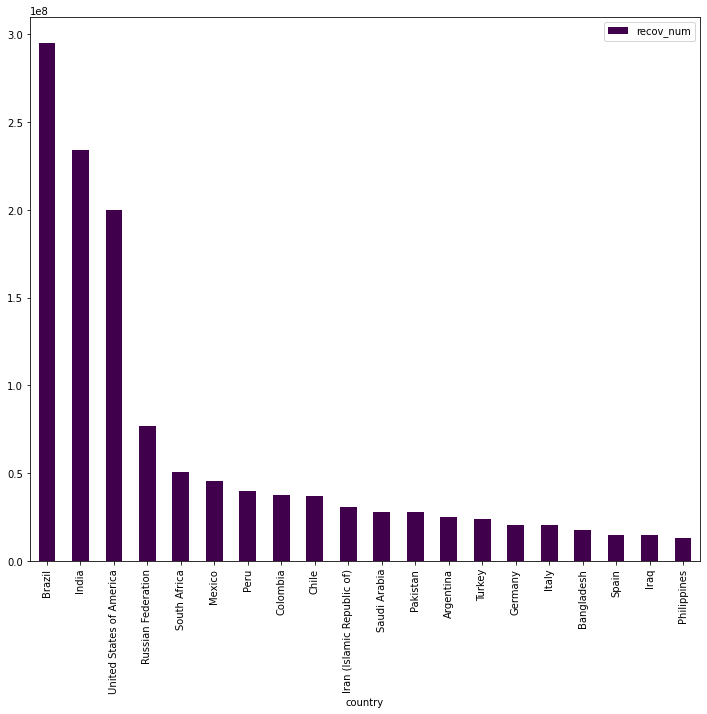

In [ ]:
recuperados_2a.plot(kind = 'bar', stacked=False, colormap= 'PRGn', figsize=(12, 10)), plt.savefig('mas_recupe.png')

In [ ]:
Recuperados_2b = dieta_corta.reindex(index=["Brazil", "India", "United States of America", "Russian Federation", "South Africa", "Mexico", "Peru", "Colombia", "Chile", "Iran (Islamic Republic of)", "Saudi Arabia", "Pakistan", "Argentina", "Turkey", "Germany","Italy", "Bangladesh", "Spain", "Iraq", "Philippines"], columns=['alcoh_bever_kg', 'meat_kg',	'animal_prod_kg', 'anim_fat_kg', 'cereal_kg', 'eggs_kg', 'fruits_kg', 'seafood_kg', 'milk_kg', 'spices_kg', 'pulses_kg', 'star_roots_kg', 'veg_prod_kg', 'swet_kg', 'treenuts_kg'])

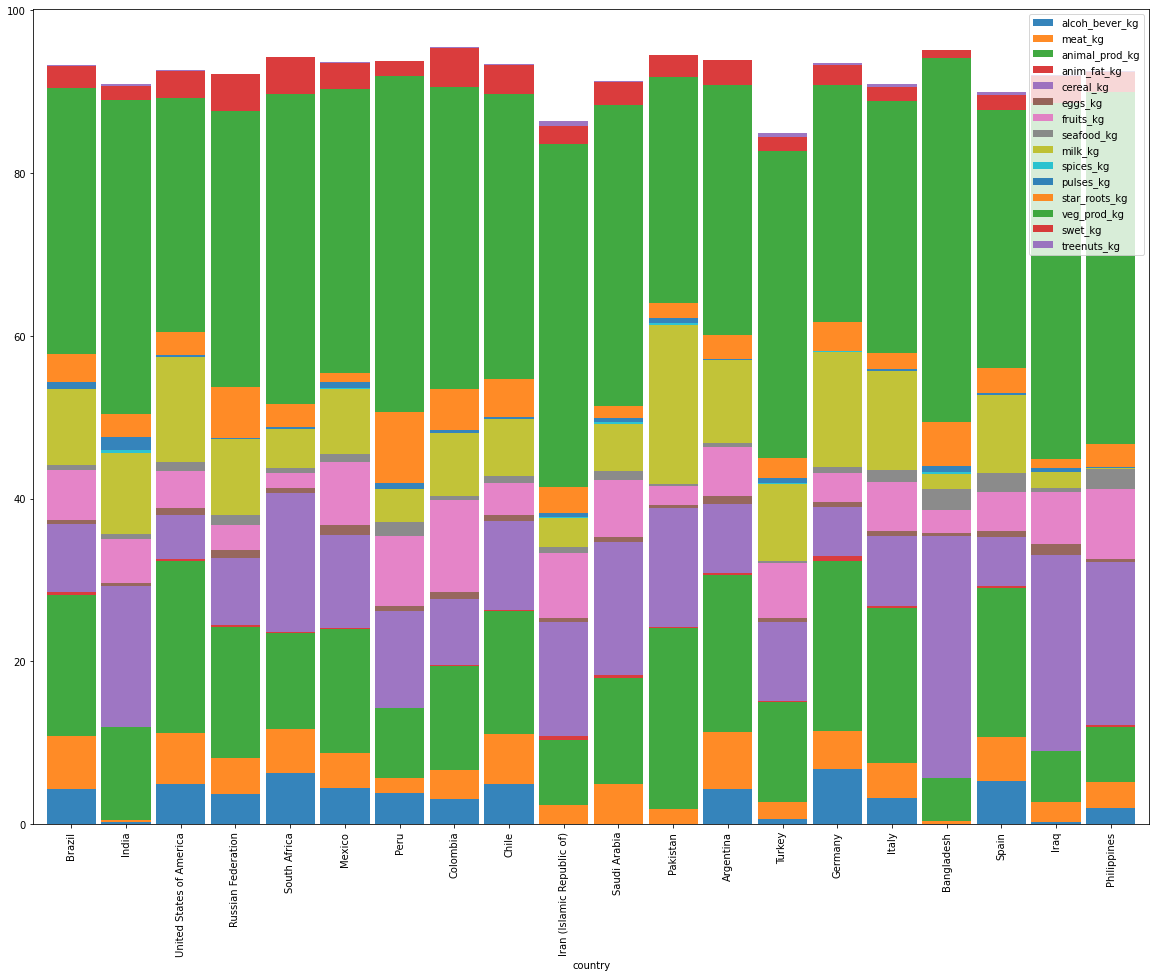

In [ ]:
Recuperados_2b.plot(kind = 'bar', stacked = 'True', alpha = 0.9, width = 0.9, figsize=(20,15)), plt.savefig('dieta_recp2.png'), plt.legend(loc='best');

Comparativos

In [ ]:
Promedios_r1 = recuperados_1['alcoh_kg'].mean(), recuperados_1['meat_kg1'].mean(), recuperados_1['animal_prod_kg1'].mean(), recuperados_1['anim_fat_kg1'].mean(), recuperados_1['cereal_kg1'].mean(), recuperados_1['eggs_kg1'].mean(), recuperados_1['fruits_kg1'].mean(), recuperados_1['seafood_kg1'].mean(), recuperados_1['milk_kg1'].mean(), recuperados_1['spices_kg1'].mean(), recuperados_1['pulses_kg1'].mean(), recuperados_1['roots_kg1'].mean(), recuperados_1['veg_kg1'].mean(), recuperados_1['swet_kg1'].mean(), recuperados_1['treenuts_kg1'].mean()

In [ ]:
Promedios_r1

(3119.035,
 4671.464999999999,
 10942.745,
 122.54500000000003,
 11802.655,
 374.40999999999997,
 7083.2300000000005,
 1989.67,
 3543.8849999999998,
 125.11499999999998,
 627.35,
 4053.075,
 39053.23000000001,
 3916.5,
 52.0)

In [ ]:
Promedios_r2 = recuperados_2['alcoh_kg'].mean(), recuperados_2['meat_kg1'].mean(), recuperados_2['animal_prod_kg1'].mean(), recuperados_2['anim_fat_kg1'].mean(), recuperados_2['cereal_kg1'].mean(), recuperados_2['eggs_kg1'].mean(), recuperados_2['fruits_kg1'].mean(), recuperados_2['seafood_kg1'].mean(), recuperados_2['milk_kg1'].mean(), recuperados_2['spices_kg1'].mean(), recuperados_2['pulses_kg1'].mean(), recuperados_2['roots_kg1'].mean(), recuperados_2['veg_kg1'].mean(), recuperados_2['swet_kg1'].mean(), recuperados_2['treenuts_kg1'].mean()

In [ ]:
Promedios_r2

(2907.129999999999,
 3866.815000000001,
 14042.85,
 208.41,
 12828.275,
 665.5800000000002,
 5764.535000000001,
 1039.795,
 8085.035000000001,
 83.20000000000002,
 460.64000000000004,
 3393.6149999999993,
 35955.17,
 2771.455,
 176.28500000000003)

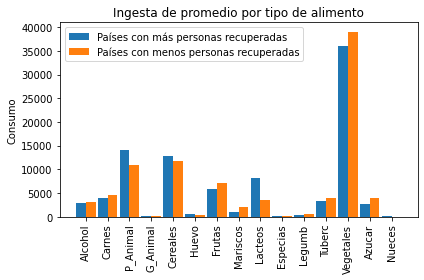

In [ ]:
Alimento_Tipo = ['Alcohol','Carnes','P_Animal', 'G_Animal', 'Cereales', 'Huevo', 'Frutas', 'Mariscos', 'Lacteos', 'Especias', 'Legumb', 'Tuberc', 'Vegetales', 'Azucar', 'Nueces']
r1_mean = [3119, 4671, 10943, 122, 11802, 374, 7083, 1989, 3544, 125, 627, 4053, 39053, 3916, 52]
r2_mean = [2907, 3867, 14043, 208, 12828, 665, 5764, 1040, 8085, 83, 460, 3393, 35955, 2771, 176]



#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(Alimento_Tipo))

#tamaño de cada barra
width = 0.45
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - width/2, r2_mean, width, label='Países con más personas recuperadas')
rects2 = ax.bar(x + width/2, r1_mean, width, label='Países con menos personas recuperadas')
 
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Consumo')
ax.set_title('Ingesta de promedio por tipo de alimento')

ax.set_xticks(x)
ax.set_xticklabels((Alimento_Tipo), rotation='vertical')

  
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

fig.tight_layout()
plt.savefig('comparativo_recuperados.png')
#Mostramos la grafica con el metodo show()

plt.show()



Los países en donde se ha presentado un mayor número de casos de personas recuperados presentan una menor ingesta promedio de alcohol, carnes y azúcares